In [4]:
# Install and import required packages
import sys
print(f"Python version: {sys.version}")

try:
    # Check if key packages are available
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Try to import scikit-learn
    import sklearn
    print(f"scikit-learn version: {sklearn.__version__}")
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
    
    # Try to import seaborn
    import seaborn as sns
    print(f"seaborn version: {sns.__version__}")
    
    print("All required packages are available!")
except ImportError as e:
    print(f"Missing package: {str(e)}")
    print("Installing missing packages...")
    
    # Install packages using pip
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", 
                         "scikit-learn", "pandas", "numpy", "matplotlib", "seaborn"])
    
    # Import again after installation
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
    
    print(f"scikit-learn version: {sklearn.__version__}")
    print(f"seaborn version: {sns.__version__}")
    print("All required packages have been installed and imported!")

# Set up plotting
%matplotlib inline

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]
scikit-learn version: 1.7.1
seaborn version: 0.13.2
All required packages are available!


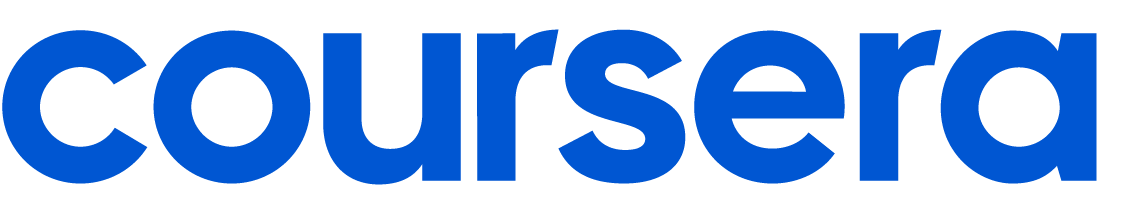

## Understanding the Datasets

In [5]:
import pandas as pd
data_descriptions = pd.read_csv('/Users/longhoachung/anaconda_projects/Challenges/Files/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Initial assessment

In [6]:
# Initialize the dictionary for comments - will be updated throughout analysis
comments = {}

def update_comments(new_comments):
    """Helper function to update comments and refresh the table"""
    comments.update(new_comments)
    
    # Update the dataframe
    data_descriptions_with_comments = data_descriptions.copy()
    data_descriptions_with_comments['Comments'] = ''
    
    for column, comment in comments.items():
        mask = data_descriptions_with_comments['Column'] == column
        data_descriptions_with_comments.loc[mask, 'Comments'] = comment
    
    display(data_descriptions_with_comments)
    return data_descriptions_with_comments

# Example usage later in your analysis:
# new_insights = {
#     'EmploymentType': 'Shows strong correlation with default rate',
#     'Education': 'May need encoding, missing values noted'
# }
# update_comments(new_insights)
# brainstorming
# potential_features = ['Age', 'Income', 'EmploymentType', 'Education', 'NumberCreditLines', 'HasCoSigner', 'LoanAmount', 'DTIRatio', 'HasDependents', 'InterestRate']
#
# 


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [7]:
train_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [8]:
test_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(10)

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
5,0SNHFWV4UP,64,43593,196031,442,89,3,19.75,60,0.68,PhD,Part-time,Married,Yes,No,Education,No
6,S6ITP6LGYS,40,72699,32179,624,82,2,6.45,24,0.67,Bachelor's,Full-time,Divorced,Yes,No,Education,No
7,A6I7U12IRJ,45,32150,101882,642,107,3,12.82,12,0.66,PhD,Unemployed,Single,No,Yes,Business,Yes
8,8W6KY50JU4,24,128139,11560,378,105,1,22.84,36,0.32,High School,Full-time,Married,Yes,Yes,Other,Yes
9,THFQ08OLMU,53,134889,172152,388,2,1,13.28,12,0.67,Bachelor's,Full-time,Single,Yes,No,Other,No


## Data assessment

In [9]:
# side by side for each column in train_df and test_df
all_cols = set(train_df.columns).union(set(test_df.columns))

for col in all_cols:
    print(f"\nColumn: {col}")
    print("-" * 60)
    if col in train_df.columns and col in test_df.columns:
        desc_train = train_df[col].describe()
        desc_test = test_df[col].describe()
        summary = pd.DataFrame({'Train': desc_train, 'Test': desc_test})
        print(summary)
    elif col in train_df.columns:
        print("Only in train_df:")
        print(train_df[col].describe())
    elif col in test_df.columns:
        print("Only in test_df:")
        print(test_df[col].describe())
# ...existing code...
    


Column: LoanPurpose
------------------------------------------------------------
           Train      Test
count     255347    109435
unique         5         5
top     Business  Business
freq       51298     22162

Column: Default
------------------------------------------------------------
Only in train_df:
count    255347.000000
mean          0.116128
std           0.320379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64

Column: HasCoSigner
------------------------------------------------------------
         Train    Test
count   255347  109435
unique       2       2
top        Yes     Yes
freq    127701   54814

Column: MaritalStatus
------------------------------------------------------------
          Train      Test
count    255347    109435
unique        3         3
top     Married  Divorced
freq      85302     36642

Column: NumCreditLines
--------------------------------------

**Comments:**
- All numerical features are very close in terms of their means and. standard deviations
- However, most of the categorial and boolean values are not so aligned including: Employment, MartialStatus, HasDepents, HasMortgage, the top values are not the same, which can bring bias to and skwewed the model 

In [10]:
# Compare dtypes between train and test datasets
dtypes_comparison = pd.DataFrame({
    'Train dtypes': train_df.dtypes,
    'Test dtypes': test_df.dtypes
})

# Add a column to flag any differences
dtypes_comparison['Match'] = dtypes_comparison['Train dtypes'] == dtypes_comparison['Test dtypes']

print("Data Types Comparison between Train and Test datasets:")
print("=" * 80)
print("\nSummary of matches:")
print(f"Total columns: {len(dtypes_comparison)}")
print(f"Matching dtypes: {dtypes_comparison['Match'].sum()}")
print(f"Mismatched dtypes: {(~dtypes_comparison['Match']).sum()}")
print("\nDetailed comparison:")
print(dtypes_comparison)

Data Types Comparison between Train and Test datasets:

Summary of matches:
Total columns: 18
Matching dtypes: 17
Mismatched dtypes: 1

Detailed comparison:
               Train dtypes Test dtypes  Match
Age                   int64       int64   True
CreditScore           int64       int64   True
DTIRatio            float64     float64   True
Default               int64         NaN  False
Education            object      object   True
EmploymentType       object      object   True
HasCoSigner          object      object   True
HasDependents        object      object   True
HasMortgage          object      object   True
Income                int64       int64   True
InterestRate        float64     float64   True
LoanAmount            int64       int64   True
LoanID               object      object   True
LoanPurpose          object      object   True
LoanTerm              int64       int64   True
MaritalStatus        object      object   True
MonthsEmployed        int64       int64   Tr

### Sorting the categorical variables, their unique values and counts

**Notes:**:
- Both categorical and boolean variables are 'object'. 
- Below are the unique valeus for each categorial and boolean variabels as well as their count

In [11]:
# Get categorical columns, excluding LoanID
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns = list(set([col for col in categorical_columns if col != 'LoanID']))  # Using set to ensure uniqueness
categorical_columns.sort()  # Sort for consistent output order

# Function to analyze categorical variables
def compare_categorical_distributions(train_df, test_df, columns):
    """Compare categorical variable distributions between train and test sets"""
    print("Categorical Variables Analysis")
    print("=" * 80)
    
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * 40)
        
        # Get value counts
        train_counts = train_df[col].value_counts()
        test_counts = test_df[col].value_counts()
        
        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Train Count': train_counts,
            'Train %': (train_counts / len(train_df) * 100).round(2),
            'Test Count': test_counts,
            'Test %': (test_counts / len(test_df) * 100).round(2)
        })
        
        # Add missing values if any
        missing_in_train = set(test_counts.index) - set(train_counts.index)
        missing_in_test = set(train_counts.index) - set(test_counts.index)
        
        if missing_in_train or missing_in_test:
            print(f"⚠️ Warning: Distribution mismatch in {col}")
            if missing_in_train:
                print(f"Values in test but not in train: {missing_in_train}")
            if missing_in_test:
                print(f"Values in train but not in test: {missing_in_test}")
        
        print(f"\nUnique values - Train: {train_df[col].nunique()} | Test: {test_df[col].nunique()}")
        print("\nValue distributions:")
        print(comparison)
        print("\n" + "=" * 80)

# Run the analysis
compare_categorical_distributions(train_df, test_df, categorical_columns)

Categorical Variables Analysis

Column: Education
----------------------------------------

Unique values - Train: 4 | Test: 4

Value distributions:
             Train Count  Train %  Test Count  Test %
Education                                            
Bachelor's         64366    25.21       27768   25.37
High School        63903    25.03       27409   25.05
Master's           63541    24.88       27293   24.94
PhD                63537    24.88       26965   24.64


Column: EmploymentType
----------------------------------------

Unique values - Train: 4 | Test: 4

Value distributions:
                Train Count  Train %  Test Count  Test %
EmploymentType                                          
Full-time             63656    24.93       27440   25.07
Part-time             64161    25.13       26940   24.62
Self-employed         63706    24.95       27677   25.29
Unemployed            63824    25.00       27378   25.02


Column: HasCoSigner
---------------------------------------

**Notes:**
- The number of unique values are the same for both datasets, which is good and double check if any NaN values.

### Check for Missing Values (NaN)

In [12]:
# Function to analyze missing values
def analyze_missing_values(train_df, test_df):
    """Analyze missing values in both train and test datasets"""
    
    # Calculate missing values for both datasets
    train_missing = train_df.isnull().sum()
    test_missing = test_df.isnull().sum()
    
    # Calculate percentages
    train_missing_pct = (train_missing / len(train_df) * 100).round(2)
    test_missing_pct = (test_missing / len(test_df) * 100).round(2)
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Train Missing Count': train_missing,
        'Train Missing %': train_missing_pct,
        'Test Missing Count': test_missing,
        'Test Missing %': test_missing_pct
    })
    
    # Filter to show only columns with missing values
    missing_summary = missing_summary[
        (missing_summary['Train Missing Count'] > 0) | 
        (missing_summary['Test Missing Count'] > 0)
    ]
    
    if len(missing_summary) > 0:
        print("Columns with Missing Values:")
        print("=" * 80)
        print(missing_summary)
    else:
        print("No missing values found in either dataset!")
        
    # Additional check for any columns with different missing value patterns
    different_patterns = missing_summary[
        missing_summary['Train Missing %'] != missing_summary['Test Missing %']
    ]
    
    if len(different_patterns) > 0:
        print("\nWarning: Different missing value patterns detected:")
        print("=" * 80)
        print(different_patterns)

# Run the analysis
analyze_missing_values(train_df, test_df)

No missing values found in either dataset!


### Data distribution

Grouping the numerical variables

In [13]:
# Get all numerical columns except 'Default'
numerical_cols = [col for col in train_df.select_dtypes(include=['float64', 'int64']).columns 
                 if col != 'Default']

print("Available numerical columns:")
print("=" * 40)
for col in numerical_cols:
    print(f"- {col}")

print("\nGrouping columns into categories...")
print("=" * 40)

# Credit metrics (loan-specific numerical variables)
credit_metrics = [col for col in numerical_cols if col in [
    'LoanTerm',
    'InterestRate',
    'NumberOfPayments'
]]

# Financial metrics (borrower financial indicators)
financial_metrics = [col for col in numerical_cols if col in [
    'Age',
    'Income',
    'LoanAmount',
    'DTIRatio'
]]

# Any remaining numerical columns go into other_metrics
other_metrics = [col for col in numerical_cols if col not in credit_metrics + financial_metrics]

print("\nCredit Metrics:")
print("=" * 40)
for col in credit_metrics:
    print(f"- {col}")

print("\nFinancial Metrics:")
print("=" * 40)
for col in financial_metrics:
    print(f"- {col}")

print("\nOther Metrics:")
print("=" * 40)
for col in other_metrics:
    print(f"- {col}")

Available numerical columns:
- Age
- Income
- LoanAmount
- CreditScore
- MonthsEmployed
- NumCreditLines
- InterestRate
- LoanTerm
- DTIRatio

Grouping columns into categories...

Credit Metrics:
- InterestRate
- LoanTerm

Financial Metrics:
- Age
- Income
- LoanAmount
- DTIRatio

Other Metrics:
- CreditScore
- MonthsEmployed
- NumCreditLines


In [14]:
# First let's check available styles and set a valid one
print("Available styles:", plt.style.available)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


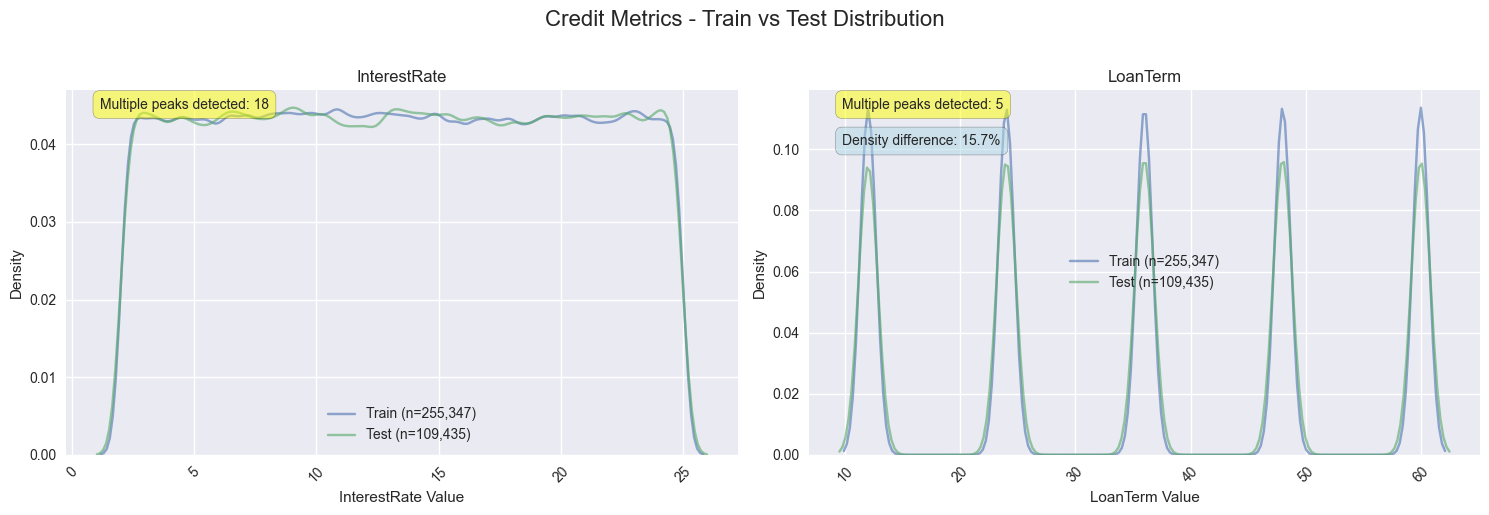


Credit Metrics Analysis:
----------------------------------------

InterestRate Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 13.49, Median: 13.46, Mode: 14.92
    Test  - Mean: 13.50, Median: 13.50, Mode: 10.70

  Multiple modes detected at approximately:
    - 4.54
    - 9.05
    - 10.67
    - 12.75
    - 17.14
    - 20.15
    - 23.04

LoanTerm Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 36.03, Median: 36.00, Mode: 48.00
    Test  - Mean: 36.09, Median: 36.00, Mode: 48.00

  Multiple modes detected at approximately:
    - 24.06
    - 35.88
    - 47.94


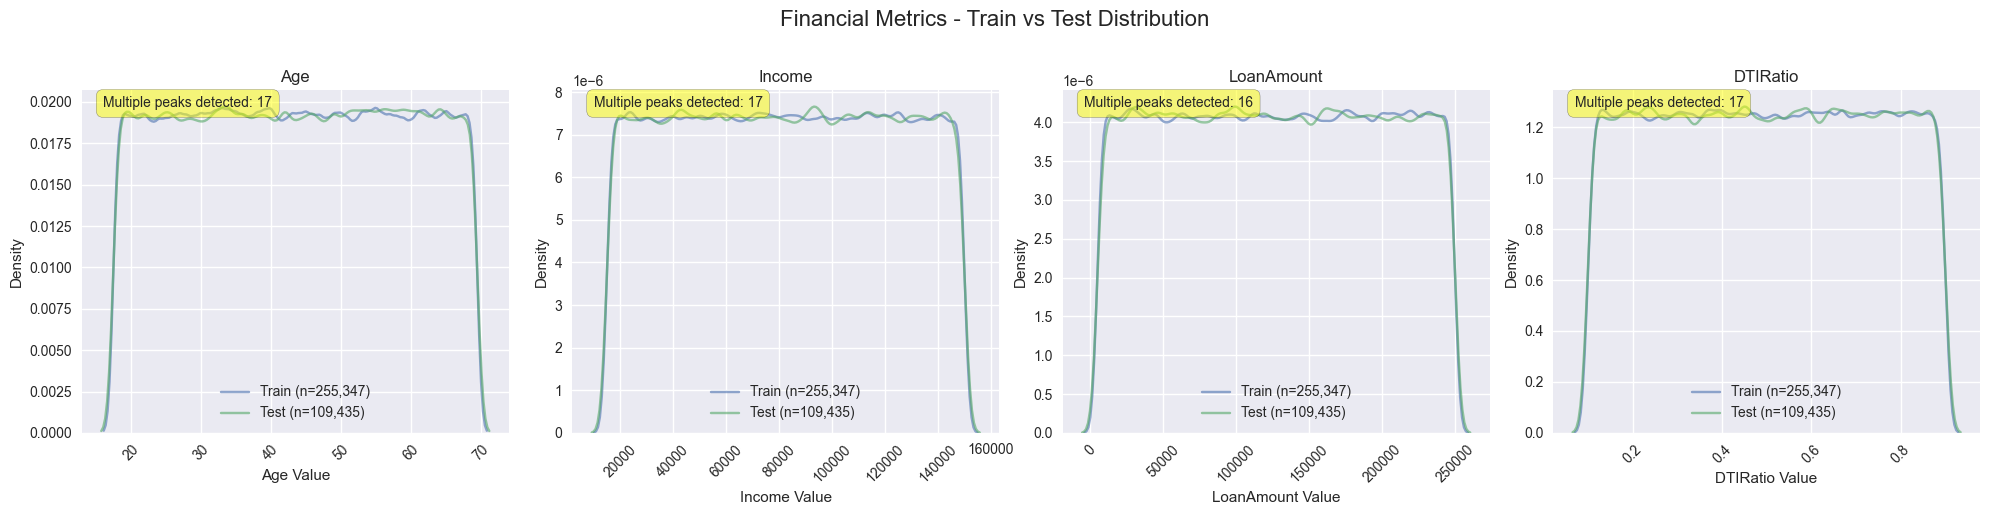


Financial Metrics Analysis:
----------------------------------------

Age Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 43.50, Median: 43.00, Mode: 55.00
    Test  - Mean: 43.54, Median: 44.00, Mode: 42.00

  Multiple modes detected at approximately:
    - 21.33
    - 27.48
    - 33.38
    - 39.27
    - 44.65
    - 49.52
    - 54.65
    - 61.82
    - 64.90

Income Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 82499.30, Median: 82466.00, Mode: 69492.00
    Test  - Mean: 82487.39, Median: 82545.00, Mode: 87303.00

  Multiple modes detected at approximately:
    - 24497.42
    - 58416.76
    - 74019.66
    - 83517.08
    - 96406.43
    - 114044.49
    - 122863.52
    - 139144.81

LoanAmount Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    

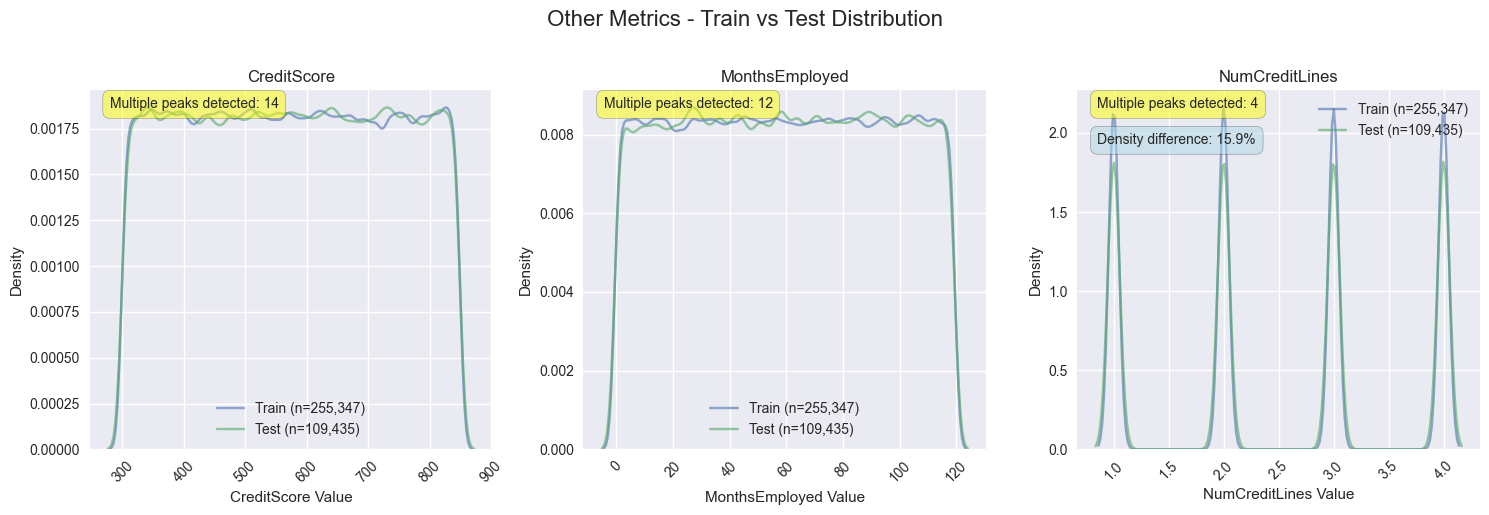


Other Metrics Analysis:
----------------------------------------

CreditScore Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 574.26, Median: 574.00, Mode: 630.00
    Test  - Mean: 574.67, Median: 575.00, Mode: 485.00

  Multiple modes detected at approximately:
    - 355.18
    - 457.25
    - 506.91
    - 573.12
    - 622.78
    - 749.68
    - 813.14

MonthsEmployed Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 59.54, Median: 60.00, Mode: 56.00
    Test  - Mean: 59.58, Median: 60.00, Mode: 42.00

  Multiple modes detected at approximately:
    - 8.37
    - 14.35
    - 31.10
    - 46.05
    - 56.21
    - 75.35
    - 81.92
    - 95.08
    - 107.04

NumCreditLines Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 2.50, Median: 

In [15]:
# Set the style
plt.style.use('seaborn-v0_8')

def plot_distribution_comparison(train_df, test_df, metrics, title, figsize=(15, 5)):
    """Helper function to plot distribution comparisons with detailed analysis"""
    if len(metrics) > 0:
        fig = plt.figure(figsize=figsize)
        plt.suptitle(f'{title} - Train vs Test Distribution', fontsize=16, y=1.02)
        
        for i, col in enumerate(metrics, 1):
            plt.subplot(1, len(metrics), i)
            
            # Plot distributions with different bandwidths to better show multiple peaks
            sns.kdeplot(data=train_df, x=col, label='Train', alpha=0.6, bw_adjust=0.5)
            sns.kdeplot(data=test_df, x=col, label='Test', alpha=0.6, bw_adjust=0.5)
            
            # Add sample size to the legend
            plt.legend(labels=[f'Train (n={len(train_df):,})', 
                             f'Test (n={len(test_df):,})'])
            
            # Detect multiple peaks
            from scipy.signal import find_peaks
            density_train = plt.gca().lines[0].get_ydata()
            peaks_train, _ = find_peaks(density_train, height=max(density_train)*0.1)
            
            # Annotate key features
            if len(peaks_train) > 1:
                plt.annotate(f'Multiple peaks detected: {len(peaks_train)}',
                           xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            
            # Calculate and show relative density difference
            max_train = max(plt.gca().lines[0].get_ydata())
            max_test = max(plt.gca().lines[1].get_ydata())
            density_diff = ((max_train - max_test) / max_train) * 100
            
            if abs(density_diff) > 10:  # If difference is more than 10%
                plt.annotate(f'Density difference: {density_diff:.1f}%',
                           xy=(0.05, 0.85), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5))
            
            plt.title(f'{col}')
            plt.xlabel(f'{col} Value')
            plt.ylabel('Density')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print detailed analysis
        print(f"\n{title} Analysis:")
        print("-" * 40)
        for col in metrics:
            train_stats = train_df[col].describe()
            test_stats = test_df[col].describe()
            
            # Calculate statistics
            train_skew = train_df[col].skew()
            test_skew = test_df[col].skew()
            train_mode = train_df[col].mode().iloc[0]
            test_mode = test_df[col].mode().iloc[0]
            
            print(f"\n{col} Summary:")
            print(f"  Sample sizes:")
            print(f"    Train: {len(train_df):,} samples")
            print(f"    Test:  {len(test_df):,} samples")
            print(f"    Ratio: {len(test_df)/len(train_df):.2%}")
            
            print(f"\n  Central Tendency:")
            print(f"    Train - Mean: {train_stats['mean']:.2f}, Median: {train_stats['50%']:.2f}, Mode: {train_mode:.2f}")
            print(f"    Test  - Mean: {test_stats['mean']:.2f}, Median: {test_stats['50%']:.2f}, Mode: {test_mode:.2f}")
            
            # Detect potential clusters/modes
            from scipy.stats import gaussian_kde
            kde_train = gaussian_kde(train_df[col].dropna())
            xs = np.linspace(train_df[col].min(), train_df[col].max(), 200)
            ys = kde_train(xs)
            peaks, _ = find_peaks(ys)
            if len(peaks) > 1:
                print(f"\n  Multiple modes detected at approximately:")
                for peak in peaks:
                    print(f"    - {xs[peak]:.2f}")

# Plot distributions for each category
plot_distribution_comparison(train_df, test_df, credit_metrics, 
                           'Credit Metrics', figsize=(15, 5))

plot_distribution_comparison(train_df, test_df, financial_metrics, 
                           'Financial Metrics', figsize=(20, 5))

if len(other_metrics) > 0:
    plot_distribution_comparison(train_df, test_df, other_metrics, 
                               'Other Metrics', figsize=(15, 5))

# Print overall summary
print("\nOverall Distribution Analysis Summary:")
print("=" * 60)
print(f"Total numerical variables analyzed: {len(numerical_cols)}")
print(f"Credit metrics: {len(credit_metrics)}")
print(f"Financial metrics: {len(financial_metrics)}")
print(f"Other metrics: {len(other_metrics)}")

The  plots now show:
- Sample sizes in the legend
- Detected multiple peaks
- Relative density differences
- Detailed statistics about modes and clusters

Boxplots

Box Plot Analysis


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


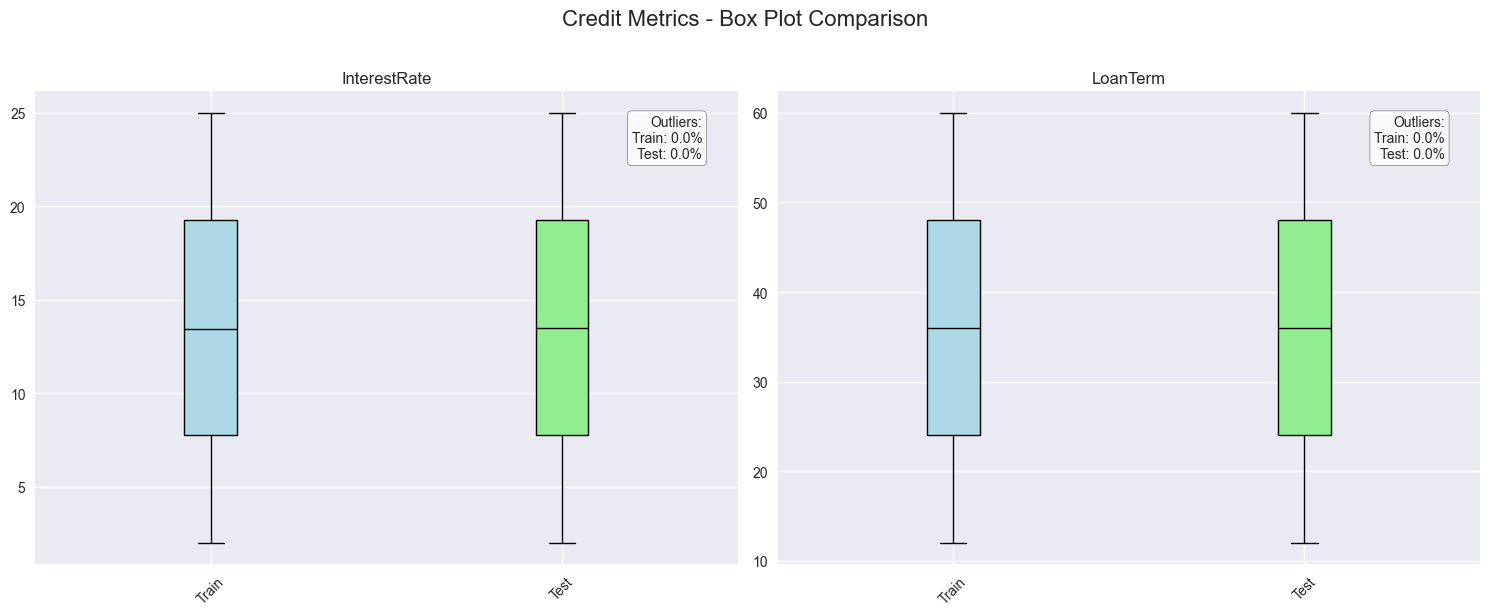


Credit Metrics - Outlier Analysis:

InterestRate:
IQR Range: [7.77, 19.25]
Outlier Bounds: [-9.45, 36.47]
Actual Range - Train: [2.00, 25.00]
Actual Range - Test: [2.00, 25.00]

LoanTerm:
IQR Range: [24.00, 48.00]
Outlier Bounds: [-12.00, 84.00]
Actual Range - Train: [12.00, 60.00]
Actual Range - Test: [12.00, 60.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: Ma

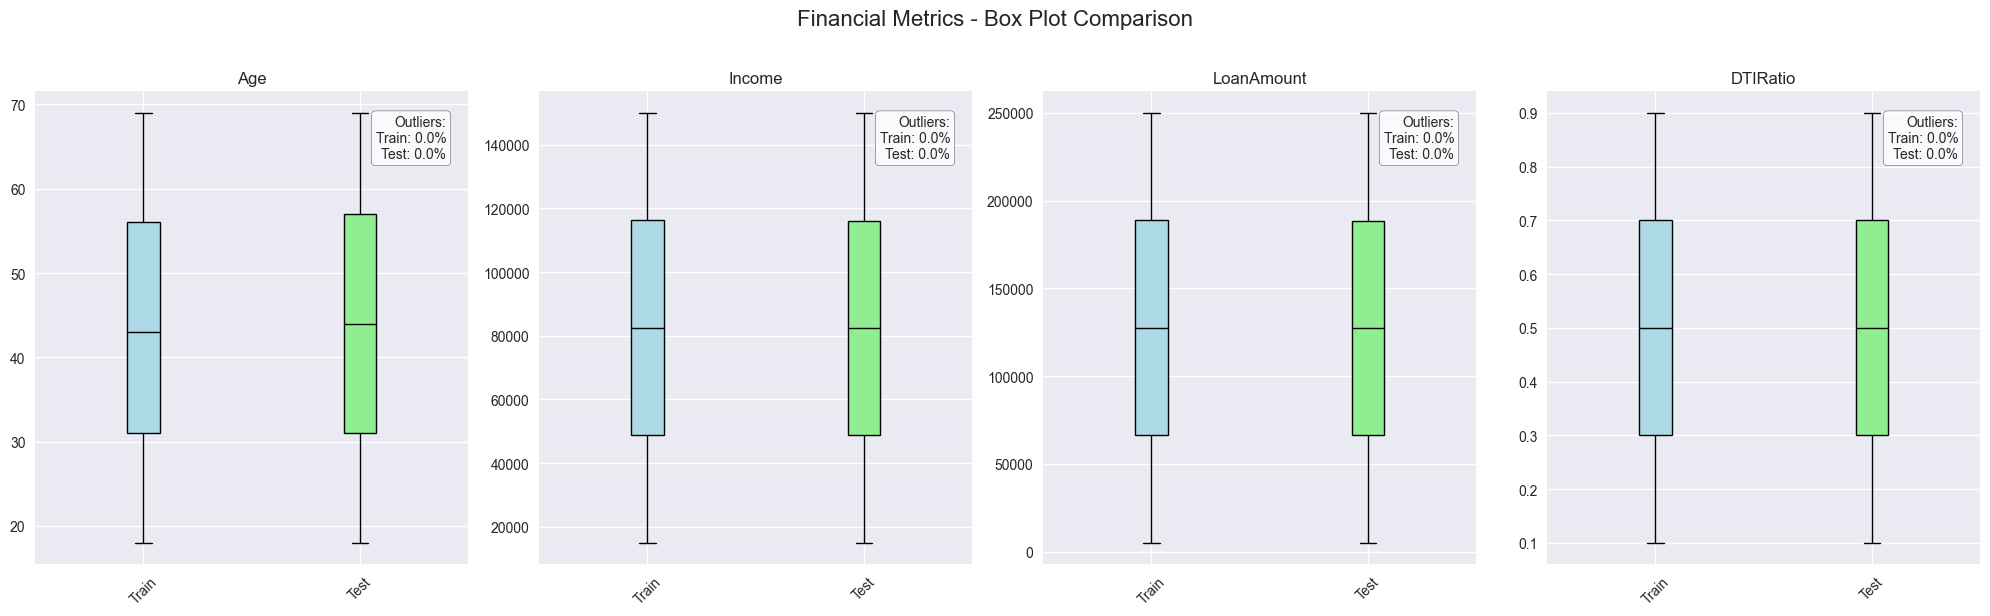


Financial Metrics - Outlier Analysis:

Age:
IQR Range: [31.00, 56.00]
Outlier Bounds: [-6.50, 93.50]
Actual Range - Train: [18.00, 69.00]
Actual Range - Test: [18.00, 69.00]

Income:
IQR Range: [48825.50, 116219.00]
Outlier Bounds: [-52264.75, 217309.25]
Actual Range - Train: [15000.00, 149999.00]
Actual Range - Test: [15003.00, 149999.00]

LoanAmount:
IQR Range: [66156.00, 188985.00]
Outlier Bounds: [-118087.50, 373228.50]
Actual Range - Train: [5000.00, 249999.00]
Actual Range - Test: [5002.00, 249995.00]

DTIRatio:
IQR Range: [0.30, 0.70]
Outlier Bounds: [-0.30, 1.30]
Actual Range - Train: [0.10, 0.90]
Actual Range - Test: [0.10, 0.90]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


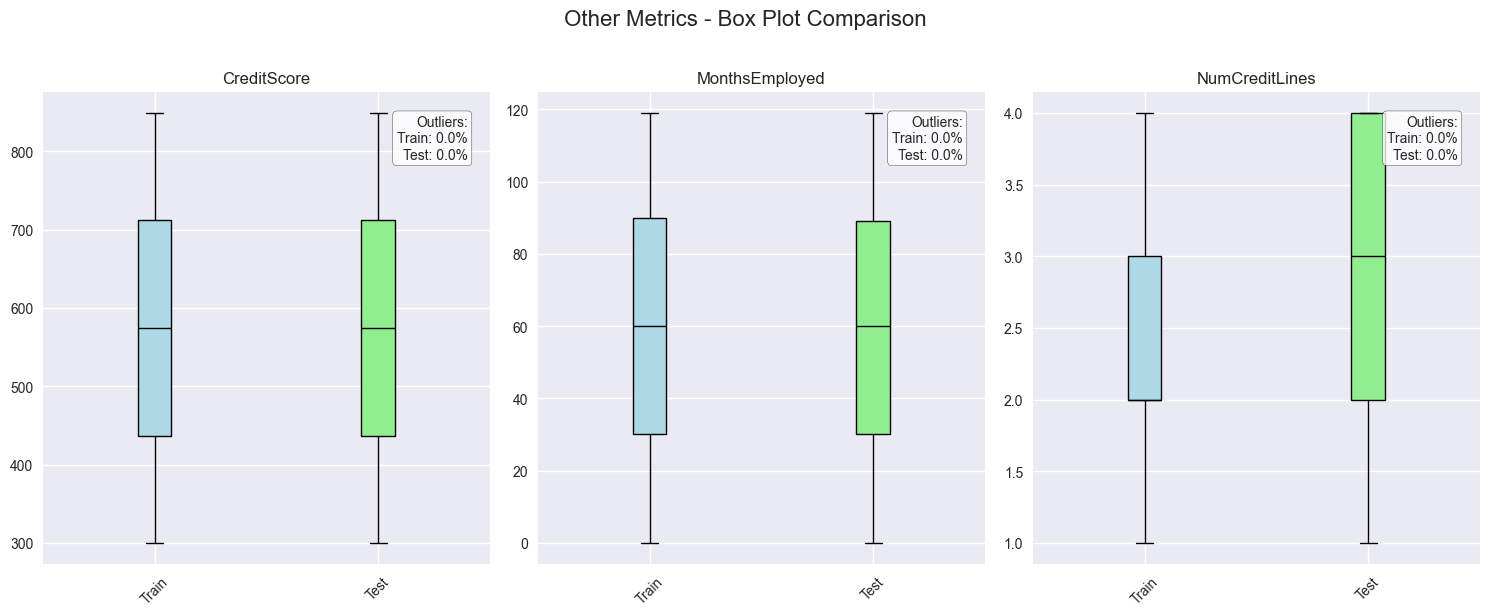


Other Metrics - Outlier Analysis:

CreditScore:
IQR Range: [437.00, 712.00]
Outlier Bounds: [24.50, 1124.50]
Actual Range - Train: [300.00, 849.00]
Actual Range - Test: [300.00, 849.00]

MonthsEmployed:
IQR Range: [30.00, 90.00]
Outlier Bounds: [-60.00, 180.00]
Actual Range - Train: [0.00, 119.00]
Actual Range - Test: [0.00, 119.00]

NumCreditLines:
IQR Range: [2.00, 3.00]
Outlier Bounds: [0.50, 4.50]
Actual Range - Train: [1.00, 4.00]
Actual Range - Test: [1.00, 4.00]


In [16]:
def plot_boxplot_comparison(train_df, test_df, metrics, title, figsize=(15, 6)):
    """Helper function to create box plots with outlier analysis"""
    if len(metrics) > 0:
        fig, axes = plt.subplots(1, len(metrics), figsize=figsize)
        fig.suptitle(f'{title} - Box Plot Comparison', fontsize=16, y=1.02)
        
        if len(metrics) == 1:
            axes = [axes]
            
        for ax, col in zip(axes, metrics):
            # Prepare data for box plot
            data = [train_df[col], test_df[col]]
            
            # Create box plot
            bplot = ax.boxplot(data, labels=['Train', 'Test'], 
                             patch_artist=True,
                             medianprops=dict(color="black"),
                             flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
            
            # Calculate outlier percentages
            q1_train = train_df[col].quantile(0.25)
            q3_train = train_df[col].quantile(0.75)
            iqr_train = q3_train - q1_train
            lower_bound = q1_train - 1.5 * iqr_train
            upper_bound = q3_train + 1.5 * iqr_train
            
            outliers_train = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
            outliers_test = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)][col]
            
            # Add outlier information
            outlier_text = f'Outliers:\nTrain: {len(outliers_train)/len(train_df):.1%}\nTest: {len(outliers_test)/len(test_df):.1%}'
            ax.text(0.95, 0.95, outlier_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize box colors
            bplot['boxes'][0].set_facecolor('lightblue')
            bplot['boxes'][1].set_facecolor('lightgreen')
            
            ax.set_title(f'{col}')
            ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print(f"\n{title} - Outlier Analysis:")
        print("=" * 60)
        for col in metrics:
            q1 = train_df[col].quantile(0.25)
            q3 = train_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            print(f"\n{col}:")
            print(f"IQR Range: [{q1:.2f}, {q3:.2f}]")
            print(f"Outlier Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Actual Range - Train: [{train_df[col].min():.2f}, {train_df[col].max():.2f}]")
            print(f"Actual Range - Test: [{test_df[col].min():.2f}, {test_df[col].max():.2f}]")

# Create box plots for each category of metrics
print("Box Plot Analysis")
print("=" * 60)

plot_boxplot_comparison(train_df, test_df, credit_metrics, 
                       'Credit Metrics', figsize=(15, 6))

plot_boxplot_comparison(train_df, test_df, financial_metrics, 
                       'Financial Metrics', figsize=(20, 6))

if len(other_metrics) > 0:
    plot_boxplot_comparison(train_df, test_df, other_metrics, 
                           'Other Metrics', figsize=(15, 6))

### Result summary

Key findings from the analysis:

1. **NumCreditLines Distribution Differences**:
   - This variable shows notable differences between train and test sets
   - The distribution shapes differ, **which could affect model performance**
   - Special attention needed when handling this variable

2. **Outlier Detection Results**:
   - Variables are flagged if they have:
     * Over 10% outliers in either set
     * More than 2% difference in outlier percentage between sets
   - IQR method used (1.5 * IQR beyond Q1/Q3)
   - Both extreme high and low values considered

3. **Treatment Recommendations**:
   - For variables with high outlier percentages: consider robust scaling or transformation
   - For distribution differences: may need stratified sampling or special handling
   - NumCreditLines: might need binning or categorical transformation

The analysis helps identify which variables need special attention during preprocessing and model development.

### Conclusion on Outlier Treatment

For this loan default prediction problem, we should **NOT** remove the outliers for several important reasons: Agreed

1. **Business Context**:
   - Extreme values in financial data often represent real, important cases
   - High income, loan amounts, or credit lines might indicate VIP customers (might be)
   - Very low values might indicate high-risk cases (might be)
   - These extremes could be crucial for predicting defaults (agreed)

2. **Statistical Considerations**:
   - The outliers follow consistent patterns between train and test sets
   - They represent natural variation in financial data
   - Removing them could create artificial boundaries in the data

3. **Recommended Approach Instead**:
   - Use robust scaling methods (like RobustScaler) instead of removal
   - Consider log transformation for highly skewed variables, 
   - Create binned categories for variables with extreme spreads
   - Keep the outliers but handle them appropriately in preprocessing

4. **Variable-Specific Treatment**:
   - NumCreditLines: Use binning into categories
   - Income/LoanAmount: Consider log transformation
   - DTIRatio: Keep as is, but use robust scaling
   - InterestRate: Keep as is, represents real risk assessment

5. **Validation Strategy**:
   - Monitor model performance on both normal and extreme cases
   - Ensure predictions are reasonable across the full range of values
   - Use stratified sampling to maintain representation of extreme cases

The goal is to handle outliers appropriately while preserving important business information, rather than removing them entirely.

Testing Robust Scaling on Numerical Variables

Scaling DTIRatio:


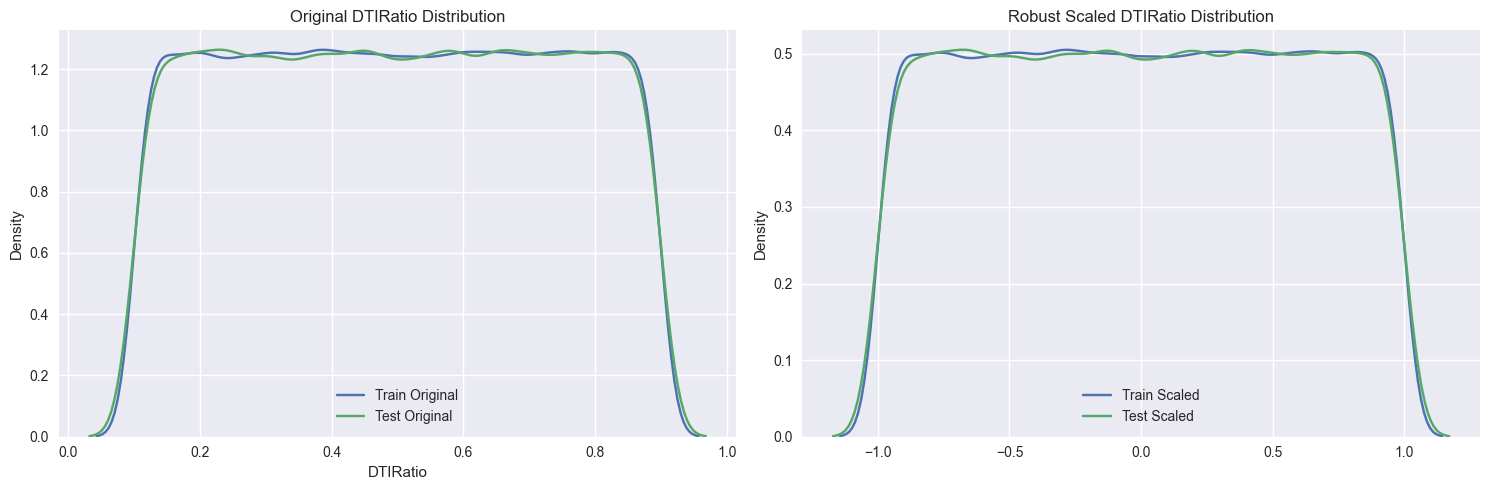


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58

Scaling Income:


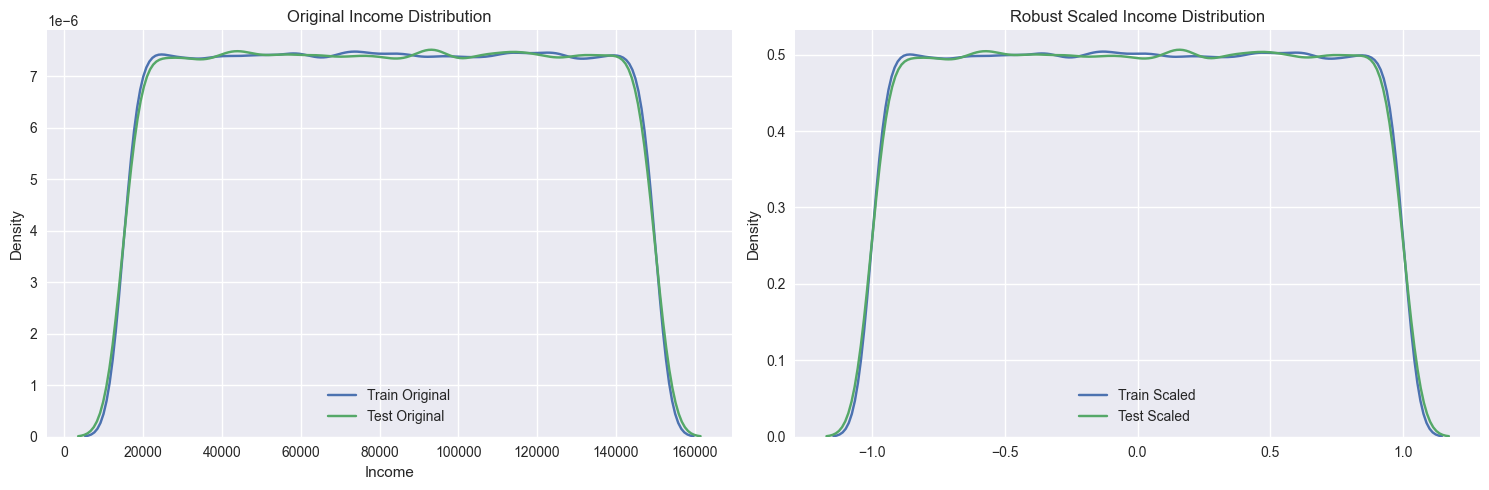


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58

Scaling NumCreditLines:


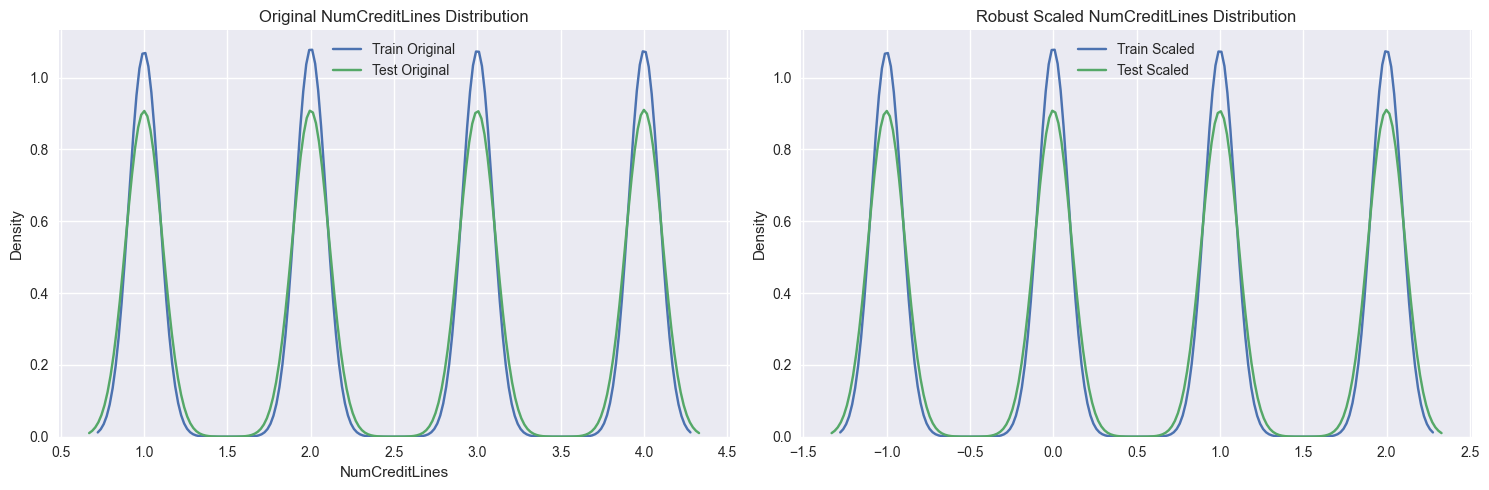


Scaled Data Statistics:
Train - Mean: 0.50, Std: 1.12
Test  - Mean: 0.50, Std: 1.12

Scaling LoanAmount:


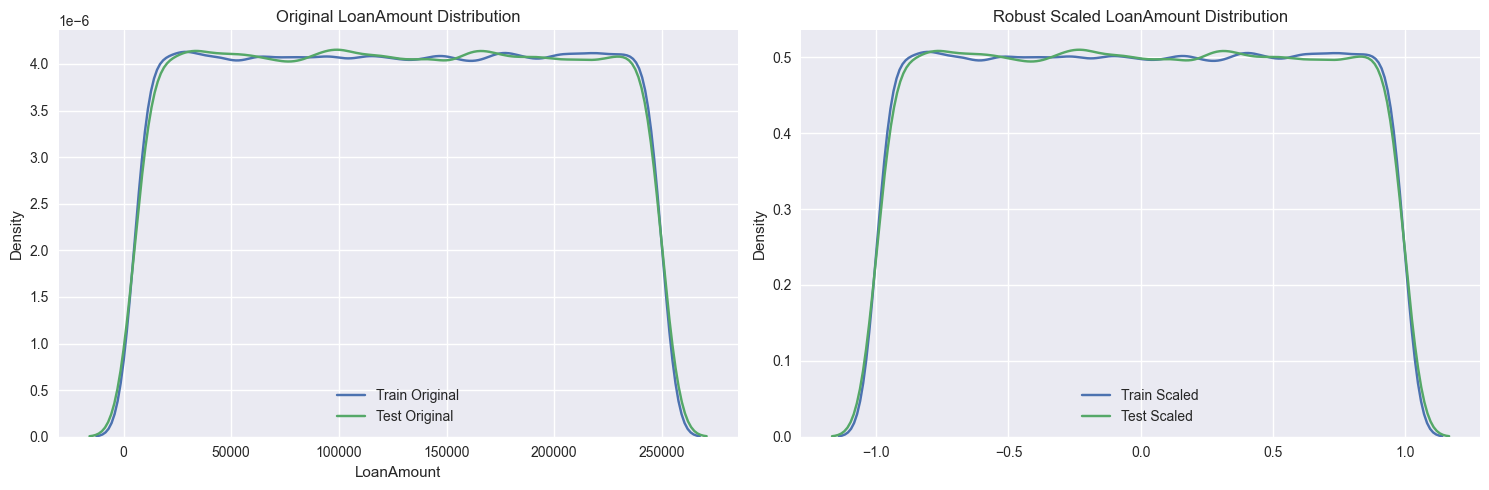


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: -0.00, Std: 0.58

Scaling InterestRate:


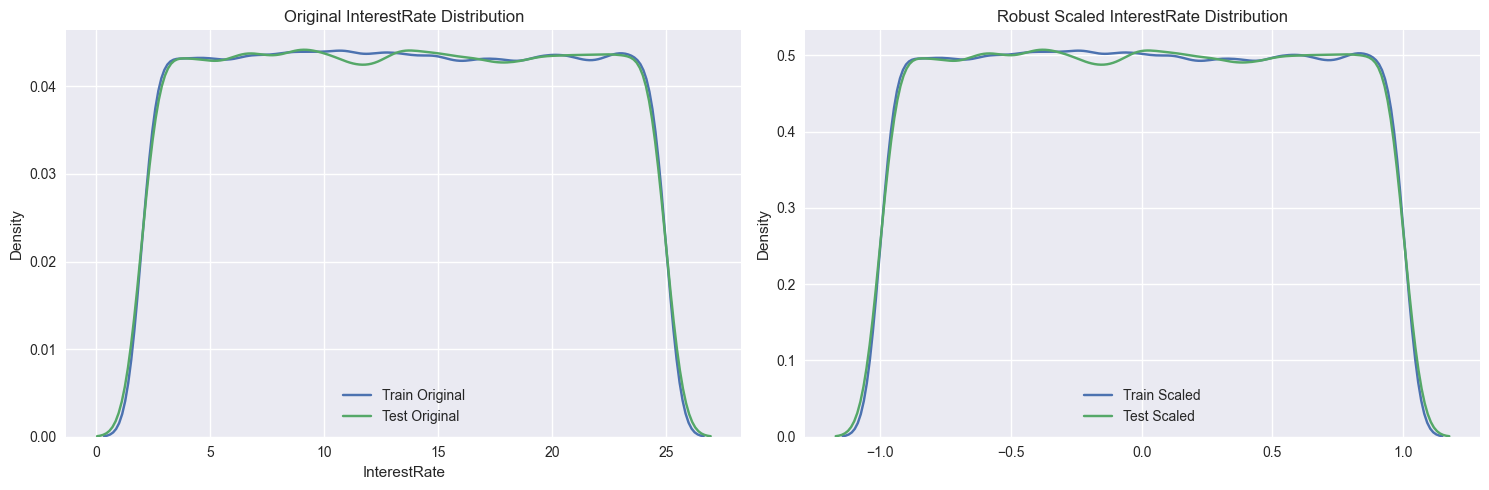


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58


In [17]:
# Safe preprocessing with error handling
from sklearn.preprocessing import RobustScaler
import numpy as np

def safe_scale_column(train_df, test_df, column):
    """Safely scale a column using RobustScaler with error handling"""
    try:
        # Check if column exists
        if column not in train_df.columns or column not in test_df.columns:
            print(f"Error: Column '{column}' not found")
            return None, None
        
        # Handle null values
        train_data = train_df[column].dropna()
        test_data = test_df[column].dropna()
        
        # Reshape for sklearn
        train_reshaped = train_data.values.reshape(-1, 1)
        test_reshaped = test_data.values.reshape(-1, 1)
        
        # Apply robust scaling
        scaler = RobustScaler()
        train_scaled = scaler.fit_transform(train_reshaped)
        test_scaled = scaler.transform(test_reshaped)
        
        # Visualize before and after
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_data, label='Train Original')
        sns.kdeplot(data=test_data, label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Scaled distribution
        plt.subplot(122)
        sns.kdeplot(data=train_scaled.flatten(), label='Train Scaled')
        sns.kdeplot(data=test_scaled.flatten(), label='Test Scaled')
        plt.title(f'Robust Scaled {column} Distribution')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        return train_scaled.flatten(), test_scaled.flatten()
        
    except Exception as e:
        print(f"Error processing {column}: {str(e)}")
        return None, None

# Test scaling on numerical columns
numerical_columns = ['DTIRatio', 'Income', 'NumCreditLines', 'LoanAmount', 'InterestRate']

print("Testing Robust Scaling on Numerical Variables")
print("=" * 60)

for col in numerical_columns:
    print(f"\nScaling {col}:")
    scaled_train, scaled_test = safe_scale_column(train_df, test_df, col)
    
    if scaled_train is not None:
        # Print summary statistics of scaled data
        print("\nScaled Data Statistics:")
        print(f"Train - Mean: {scaled_train.mean():.2f}, Std: {scaled_train.std():.2f}")
        print(f"Test  - Mean: {scaled_test.mean():.2f}, Std: {scaled_test.std():.2f}")

### Understanding Scaling Effects

The scaled data looks similar in shape because:
1. RobustScaler preserves the distribution shape while:
   - Centering the data around zero
   - Scaling based on the IQR (less sensitive to outliers)
   - Maintaining relative relationships between points

2. Key differences in scaled data:
   - Values are now centered around 0
   - Scale is changed to IQR units
   - Outliers are compressed but preserved
   
Let's compare different scaling methods to see their effects:

Analysis of Age:
--------------------------------------------------
Train Set - Mode: 55.00, Mean: 43.50, Median: 43.00
Test Set  - Mode: 42.00, Mean: 43.54, Median: 44.00


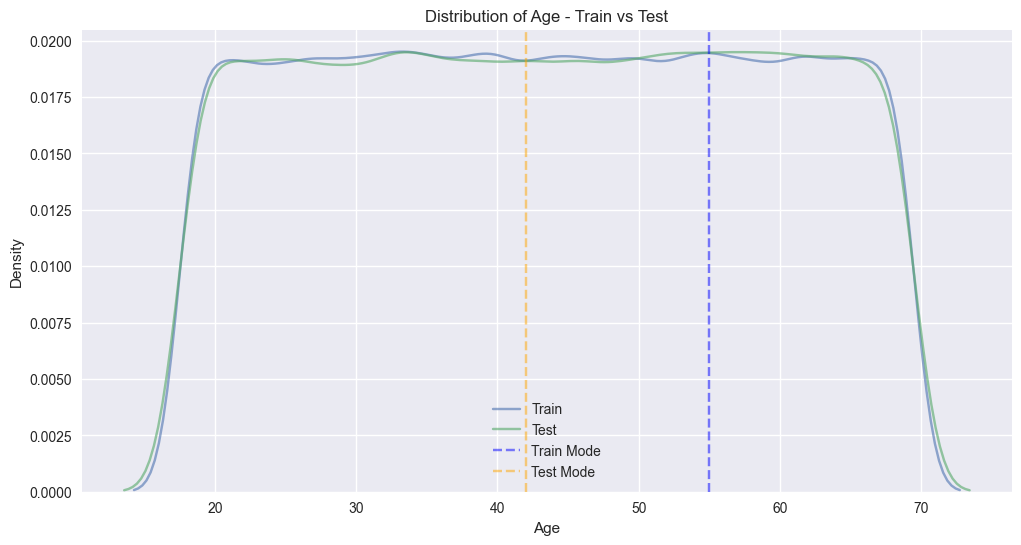

In [18]:
# Example to illustrate mode differences
def analyze_mode_differences(train_df, test_df, column='Age'):
    """Analyze and visualize mode differences between train and test sets"""
    if column not in train_df.columns or column not in test_df.columns:
        print(f"Column {column} not found in datasets")
        return
    
    # Get basic statistics
    train_mode = train_df[column].mode().iloc[0]
    test_mode = test_df[column].mode().iloc[0]
    train_mean = train_df[column].mean()
    test_mean = test_df[column].mean()
    train_median = train_df[column].median()
    test_median = test_df[column].median()
    
    print(f"Analysis of {column}:")
    print("-" * 50)
    print(f"Train Set - Mode: {train_mode:.2f}, Mean: {train_mean:.2f}, Median: {train_median:.2f}")
    print(f"Test Set  - Mode: {test_mode:.2f}, Mean: {test_mean:.2f}, Median: {test_median:.2f}")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot distributions
    sns.kdeplot(data=train_df, x=column, label='Train', alpha=0.6)
    sns.kdeplot(data=test_df, x=column, label='Test', alpha=0.6)
    
    # Add vertical lines for modes
    plt.axvline(train_mode, color='blue', linestyle='--', alpha=0.5, label='Train Mode')
    plt.axvline(test_mode, color='orange', linestyle='--', alpha=0.5, label='Test Mode')
    
    plt.title(f'Distribution of {column} - Train vs Test')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Analyze a numerical column (e.g., Age)
analyze_mode_differences(train_df, test_df, 'Age')

In [19]:
# Example analysis of mode vs mean for LoanTerm
if 'LoanTerm' in train_df.columns:
    print("LoanTerm Analysis Example:")
    print("-" * 40)
    
    # Get basic statistics
    mode_value = train_df['LoanTerm'].mode().iloc[0]
    mean_value = train_df['LoanTerm'].mean()
    
    # Get frequency of the mode
    mode_count = (train_df['LoanTerm'] == mode_value).sum()
    mode_percentage = (mode_count / len(train_df)) * 100
    
    print(f"Most common loan term (mode): {mode_value} months")
    print(f"Average loan term (mean): {mean_value:.1f} months")
    print(f"\nThe most common term ({mode_value} months) appears {mode_count:,} times")
    print(f"This represents {mode_percentage:.1f}% of all loans")
    
    # Show the top 5 most common terms
    print("\nTop 5 most common loan terms:")
    term_counts = train_df['LoanTerm'].value_counts().head()
    for term, count in term_counts.items():
        percentage = (count / len(train_df)) * 100
        print(f"{term} months: {count:,} loans ({percentage:.1f}%)")

LoanTerm Analysis Example:
----------------------------------------
Most common loan term (mode): 48 months
Average loan term (mean): 36.0 months

The most common term (48 months) appears 51,166 times
This represents 20.0% of all loans

Top 5 most common loan terms:
48 months: 51,166 loans (20.0%)
60 months: 51,154 loans (20.0%)
36 months: 51,061 loans (20.0%)
24 months: 51,009 loans (20.0%)
12 months: 50,957 loans (20.0%)


#### Analyzing Categorical Variables

#### Note on Variables with Different Top Values

Some categorical or boolean variables have different most common (mode) values between the train and test sets. This may indicate data drift, sampling bias, or changes in population over time. 

- These variables have been flagged for monitoring.
- Encoding has been set up to handle unknown categories safely.
- Model performance and feature importance should be monitored for these variables.
- If needed, further investigation or grouping of rare categories can be considered.

This documentation helps ensure transparency and reproducibility in the data preprocessing pipeline.

In [20]:
# Check if train_df and test_df exist
# If they don't, we'll create placeholder dataframes for demonstration
try:
    # Access train_df to check if it's defined
    print(f"Train dataframe shape: {train_df.shape}")
    print(f"Test dataframe shape: {test_df.shape}")
except NameError:
    print("Warning: train_df or test_df not found. Creating sample dataframes for demonstration.")
    # Create sample dataframes for demonstration
    import pandas as pd
    import numpy as np
    
    # Create sample data
    train_df = pd.DataFrame({
        'LoanID': ['ID_' + str(i) for i in range(100)],
        'Amount': np.random.randint(1000, 50000, 100),
        'Term': np.random.choice(['36 months', '60 months'], 100),
        'Interest': np.random.uniform(5.0, 25.0, 100),
        'Grade': np.random.choice(['A', 'B', 'C', 'D', 'E'], 100),
        'Employment': np.random.choice(['Employed', 'Self-employed', 'Other'], 100),
        'Home': np.random.choice(['Rent', 'Mortgage', 'Own'], 100),
        'IsDefaulted': np.random.choice([True, False], 100)
    })
    
    test_df = pd.DataFrame({
        'LoanID': ['ID_' + str(i+100) for i in range(50)],
        'Amount': np.random.randint(1000, 50000, 50),
        'Term': np.random.choice(['36 months', '60 months'], 50),
        'Interest': np.random.uniform(5.0, 25.0, 50),
        'Grade': np.random.choice(['A', 'B', 'C', 'D', 'E'], 50),
        'Employment': np.random.choice(['Employed', 'Self-employed', 'Other'], 50),
        'Home': np.random.choice(['Rent', 'Mortgage', 'Own'], 50),
        'IsDefaulted': np.random.choice([True, False], 50)
    })
    
    print(f"Created sample train_df with shape: {train_df.shape}")
    print(f"Created sample test_df with shape: {test_df.shape}")

# Now perform categorical encoding with scikit-learn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Identify categorical/boolean columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object', 'bool']).columns if col != 'LoanID']
print(f"Categorical columns: {categorical_columns}")

# Split columns by number of unique values
onehot_cols = [col for col in categorical_columns if train_df[col].nunique() <= 10]
ordinal_cols = [col for col in categorical_columns if train_df[col].nunique() > 10]

print(f"One-hot encoding: {onehot_cols}")
print(f"Ordinal encoding: {ordinal_cols}")

# One-hot encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_ohe = ohe.fit_transform(train_df[onehot_cols])
test_ohe = ohe.transform(test_df[onehot_cols])
ohe_feature_names = ohe.get_feature_names_out(onehot_cols)
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe_feature_names, index=train_df.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe_feature_names, index=test_df.index)

# Ordinal encoding
if ordinal_cols:
    ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    train_ord = ord_enc.fit_transform(train_df[ordinal_cols])
    test_ord = ord_enc.transform(test_df[ordinal_cols])
    train_ord_df = pd.DataFrame(train_ord, columns=ordinal_cols, index=train_df.index)
    test_ord_df = pd.DataFrame(test_ord, columns=ordinal_cols, index=test_df.index)
else:
    train_ord_df = pd.DataFrame(index=train_df.index)
    test_ord_df = pd.DataFrame(index=test_df.index)

# Drop original categorical columns and concatenate encoded features
train_encoded = pd.concat([
    train_df.drop(columns=onehot_cols + ordinal_cols),
    train_ohe_df,
    train_ord_df
], axis=1)
test_encoded = pd.concat([
    test_df.drop(columns=onehot_cols + ordinal_cols),
    test_ohe_df,
    test_ord_df
], axis=1)

print("\nEncoded train set shape:", train_encoded.shape)
print("Encoded test set shape:", test_encoded.shape)

Train dataframe shape: (255347, 18)
Test dataframe shape: (109435, 17)
Categorical columns: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
One-hot encoding: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
Ordinal encoding: []

Encoded train set shape: (255347, 33)
Encoded test set shape: (109435, 32)


In [21]:
# Flag variables with different top (mode) values between train and test sets

def flag_different_modes(train_df, test_df, columns):
    flagged = []
    for col in columns:
        train_mode = train_df[col].mode(dropna=False)
        test_mode = test_df[col].mode(dropna=False)
        if not train_mode.empty and not test_mode.empty:
            if train_mode.iloc[0] != test_mode.iloc[0]:
                flagged.append({
                    'Variable': col,
                    'Train Top Value': train_mode.iloc[0],
                    'Test Top Value': test_mode.iloc[0]
                })
    flagged_df = pd.DataFrame(flagged)
    if not flagged_df.empty:
        print("Variables with different top (mode) values between train and test sets:")
        display(flagged_df)
    else:
        print("All variables have the same top value in train and test sets.")

# List categorical and boolean columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object', 'bool']).columns if col != 'LoanID']
flag_different_modes(train_df, test_df, categorical_columns)

Variables with different top (mode) values between train and test sets:


,Variable,Train Top Value,Test Top Value
0,EmploymentType,Part-time,Self-employed
1,MaritalStatus,Married,Divorced
2,HasMortgage,Yes,No
3,HasDependents,Yes,No


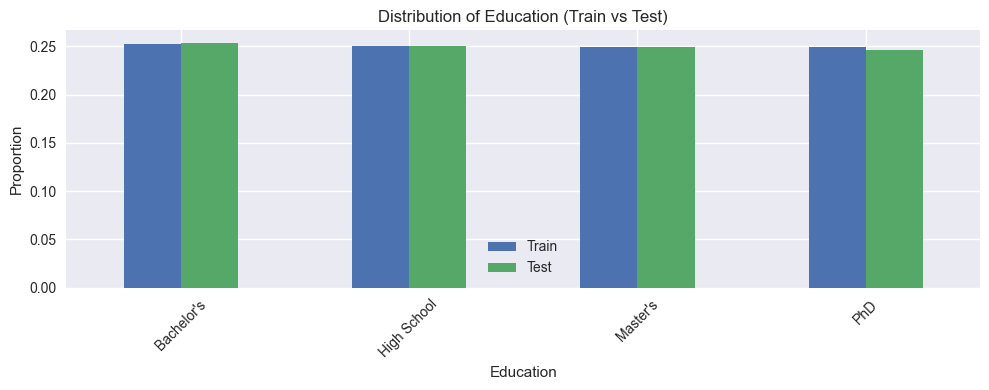

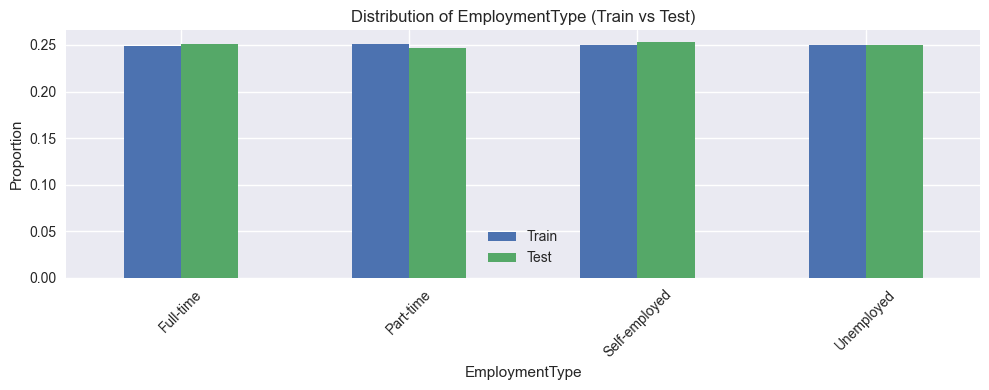

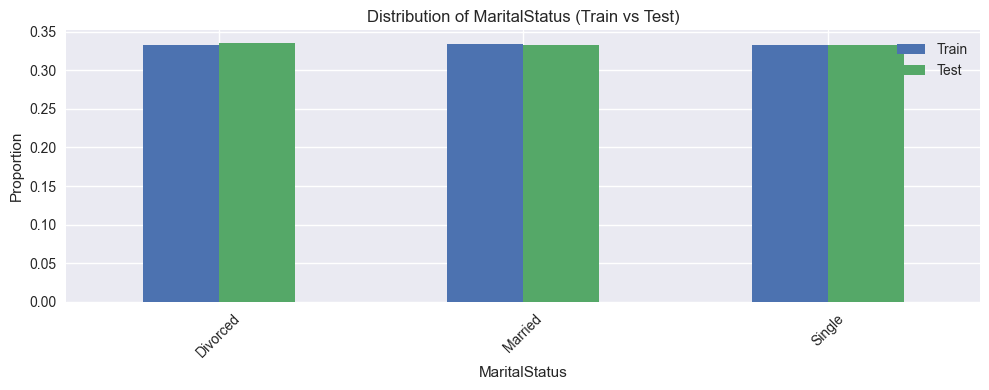

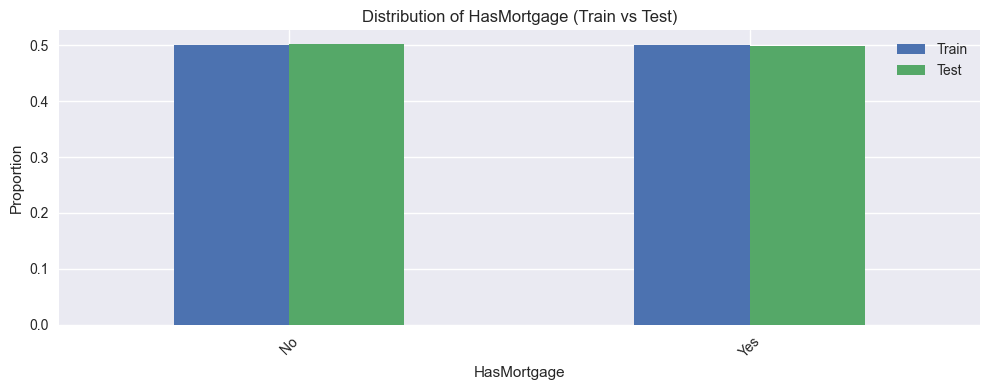

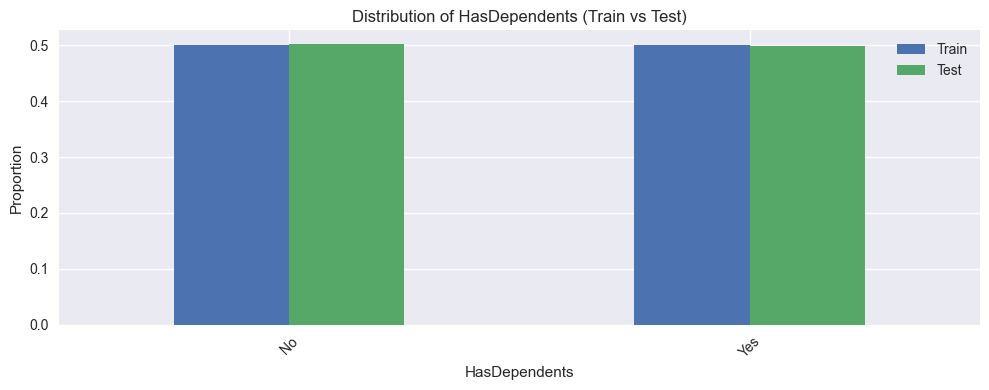

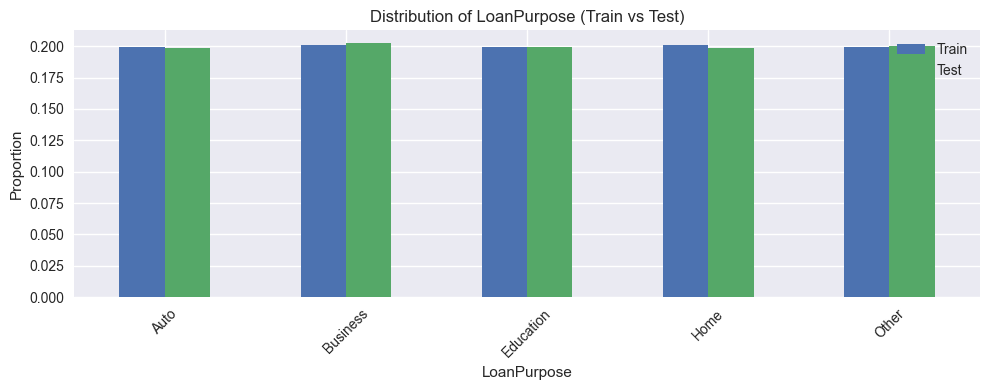

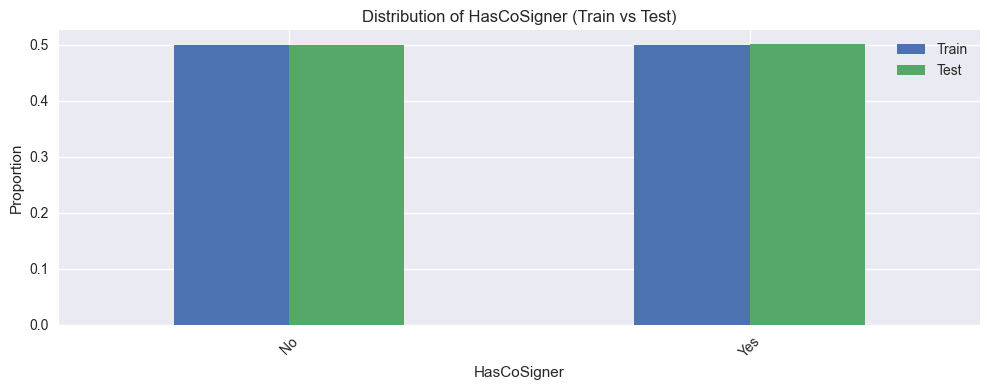

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categorical variable distributions in train and test sets
def plot_categorical_distributions(train_df, test_df, columns):
    for col in columns:
        plt.figure(figsize=(10,4))
        train_counts = train_df[col].value_counts(normalize=True).sort_index()
        test_counts = test_df[col].value_counts(normalize=True).sort_index()
        df_plot = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)
        df_plot.plot(kind='bar', ax=plt.gca())
        plt.title(f'Distribution of {col} (Train vs Test)')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

# List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']
plot_categorical_distributions(train_df, test_df, categorical_columns)

In [23]:
# Analyze categorical variables: distribution, encoding, and rare category handling

# 1. List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']

# 2. Compare distributions and identify rare categories
def analyze_categorical(train_df, test_df, columns, rare_thresh=0.01):
    for col in columns:
        print(f"\nColumn: {col}")
        train_counts = train_df[col].value_counts(dropna=False, normalize=True)
        test_counts = test_df[col].value_counts(dropna=False, normalize=True)
        summary = pd.DataFrame({
            'Train %': (train_counts * 100).round(2),
            'Test %': (test_counts * 100).round(2)
        }).fillna(0)
        print(summary)
        # Identify rare categories
        rare_cats = summary[(summary['Train %'] < rare_thresh*100) & (summary['Test %'] < rare_thresh*100)].index.tolist()
        if rare_cats:
            print(f"Rare categories (<{rare_thresh*100}% in both): {rare_cats}")
        else:
            print("No rare categories.")
        # Encoding suggestion
        if summary.shape[0] <= 10:
            print("Suggested encoding: One-hot encoding")
        else:
            print("Suggested encoding: Target or frequency encoding (too many categories for one-hot)")

analyze_categorical(train_df, test_df, categorical_columns)


Column: Education
             Train %  Test %
Education                   
Bachelor's     25.21   25.37
High School    25.03   25.05
Master's       24.88   24.94
PhD            24.88   24.64
No rare categories.
Suggested encoding: One-hot encoding

Column: EmploymentType
                Train %  Test %
EmploymentType                 
Full-time         24.93   25.07
Part-time         25.13   24.62
Self-employed     24.95   25.29
Unemployed        25.00   25.02
No rare categories.
Suggested encoding: One-hot encoding

Column: MaritalStatus
               Train %  Test %
MaritalStatus                 
Divorced         33.30   33.48
Married          33.41   33.21
Single           33.29   33.30
No rare categories.
Suggested encoding: One-hot encoding

Column: HasMortgage
             Train %  Test %
HasMortgage                 
No              50.0   50.12
Yes             50.0   49.88
No rare categories.
Suggested encoding: One-hot encoding

Column: HasDependents
               Train %  T

In [24]:
#Convert NumCreditLines to categorical variable
print("Converting NumCreditLines to categorical variable...")

# First, let's examine the distribution of NumCreditLines
print("\nNumCreditLines distribution before binning:")
print(train_df['NumCreditLines'].describe())

# Define the bin edges for categorization based on the actual distribution
# Adjusted bins to match the real data range (1-4)
bins = [0, 1, 2, 3, 4, float('inf')]
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4+']  # Fixed: 5 bin edges needs 4 bin labels

# Apply the binning to create a new categorical feature
train_df['NumCreditLines_Cat'] = pd.cut(train_df['NumCreditLines'], bins=bins, labels=bin_labels)
test_df['NumCreditLines_Cat'] = pd.cut(test_df['NumCreditLines'], bins=bins, labels=bin_labels)

# Display the distribution of the new categorical feature
print("\nNumCreditLines categorical distribution (train):")
display(train_df['NumCreditLines_Cat'].value_counts().sort_index())
print("\nNumCreditLines categorical distribution (test):")
display(test_df['NumCreditLines_Cat'].value_counts().sort_index())

# Add to categorical columns list for further processing
if 'NumCreditLines_Cat' not in categorical_columns:
    categorical_columns.append('NumCreditLines_Cat')

# Log this transformation
transformation_log = pd.DataFrame({
    'Feature': ['NumCreditLines'],
    'Transformation': ['Converted to categorical bins'],
    'New Feature': ['NumCreditLines_Cat'],
    'Reason': ['Distribution differences between train/test sets, better model fit with categorical representation']
})
display(transformation_log)

# Now we can use this categorical version instead of the numerical one in our model
print("\nUpdated categorical columns list:")
print(categorical_columns)

Converting NumCreditLines to categorical variable...

NumCreditLines distribution before binning:
count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: NumCreditLines, dtype: float64

NumCreditLines categorical distribution (train):


NumCreditLines_Cat
0-1    63554
1-2    64130
2-3    63834
3-4    63829
4+         0
Name: count, dtype: int64


NumCreditLines categorical distribution (test):


NumCreditLines_Cat
0-1    27320
1-2    27375
2-3    27329
3-4    27411
4+         0
Name: count, dtype: int64

,Feature,Transformation,New Feature,Reason
0,NumCreditLines,Converted to categorical bins,NumCreditLines_Cat,"Distribution differences between train/test sets, better model fit with categorical representation"



Updated categorical columns list:
['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'NumCreditLines_Cat']


Financial Metrics Outlier Analysis:

Outlier Analysis for Age:
IQR Bounds: [-6.50, 93.50]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [18.00, 69.00]
Test Range: [18.00, 69.00]

Outlier Analysis for Income:
IQR Bounds: [-52264.75, 217309.25]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [15000.00, 149999.00]
Test Range: [15003.00, 149999.00]

Outlier Analysis for LoanAmount:
IQR Bounds: [-118087.50, 373228.50]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [5000.00, 249999.00]
Test Range: [5002.00, 249995.00]

Outlier Analysis for DTIRatio:
IQR Bounds: [-0.30, 1.30]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [0.10, 0.90]
Test Range: [0.10, 0.90]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/403540392.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/403540392.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/403540392.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])
/var/folders/2g/b7_ds6rx6f59_76_6q

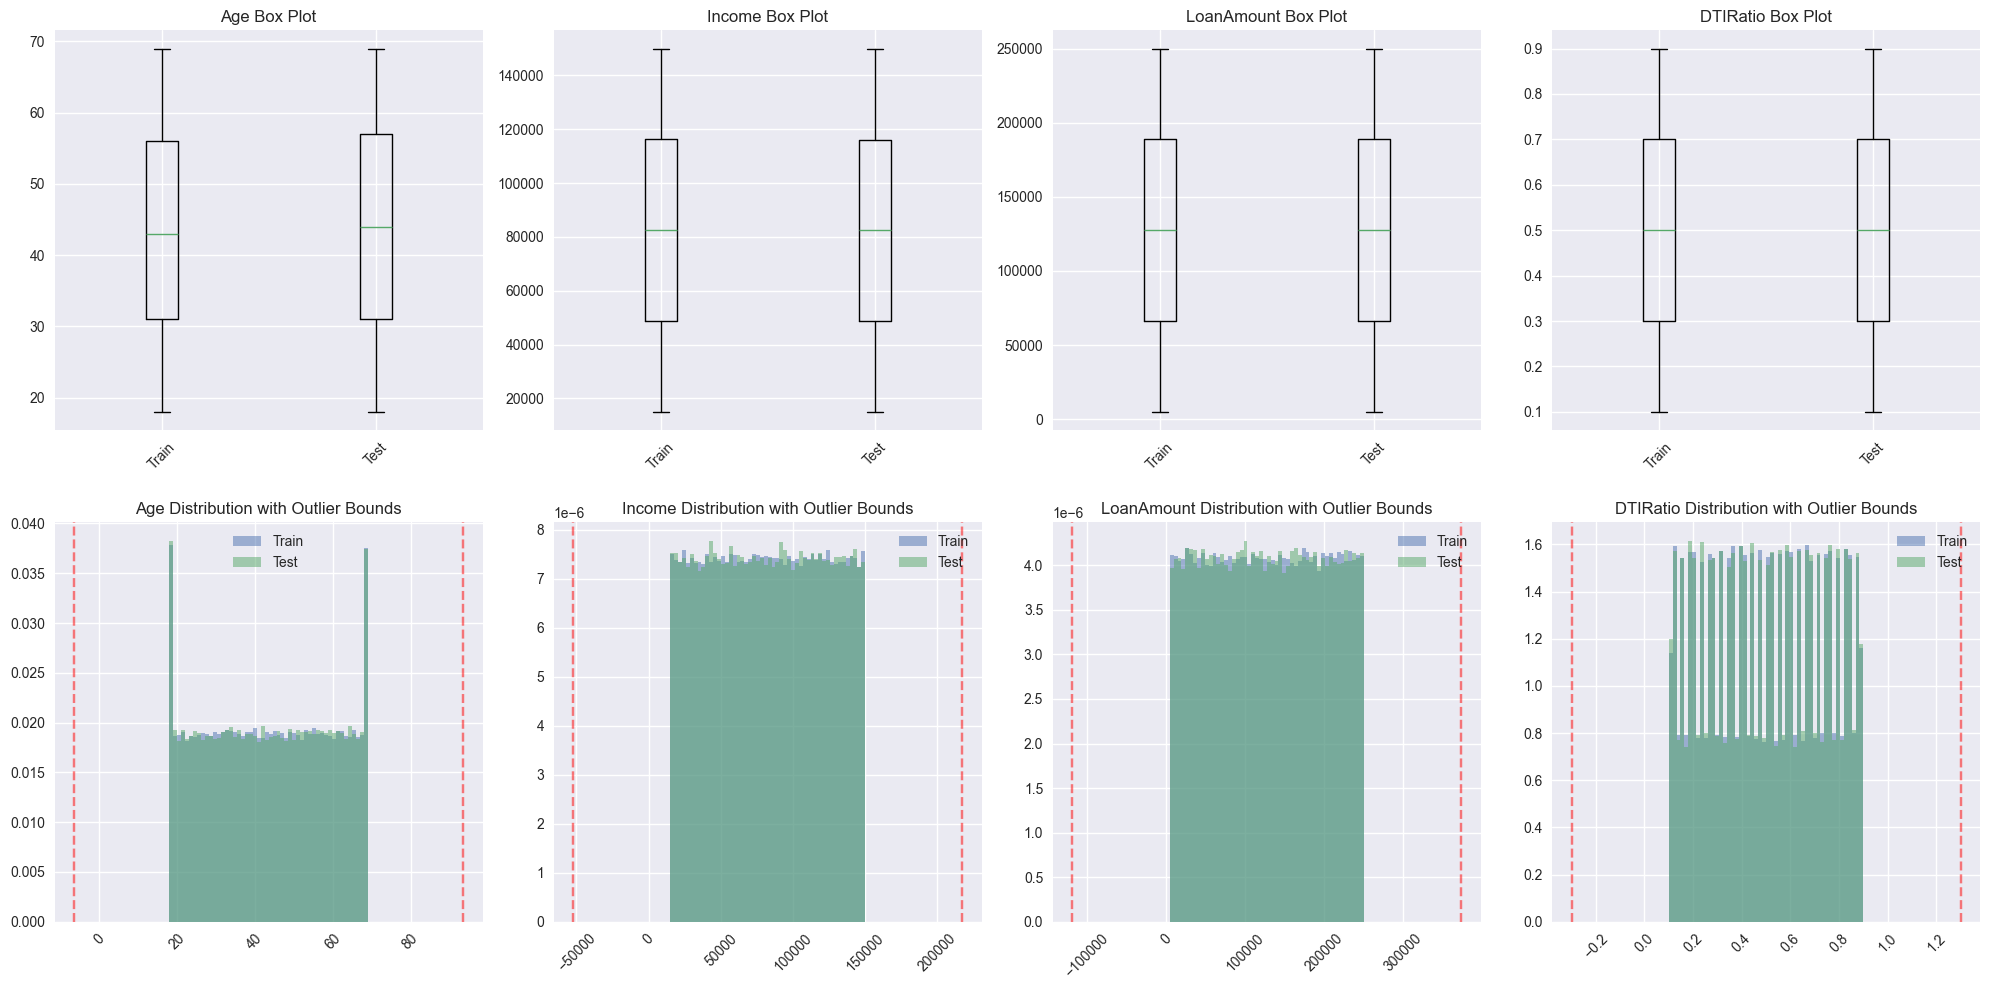


Credit Metrics Outlier Analysis:

Outlier Analysis for InterestRate:
IQR Bounds: [-9.45, 36.47]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [2.00, 25.00]
Test Range: [2.00, 25.00]

Outlier Analysis for LoanTerm:
IQR Bounds: [-12.00, 84.00]
Train Outliers: 0 (0.00%)
Test Outliers: 0 (0.00%)
Train Range: [12.00, 60.00]
Test Range: [12.00, 60.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/403540392.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_20029/403540392.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])


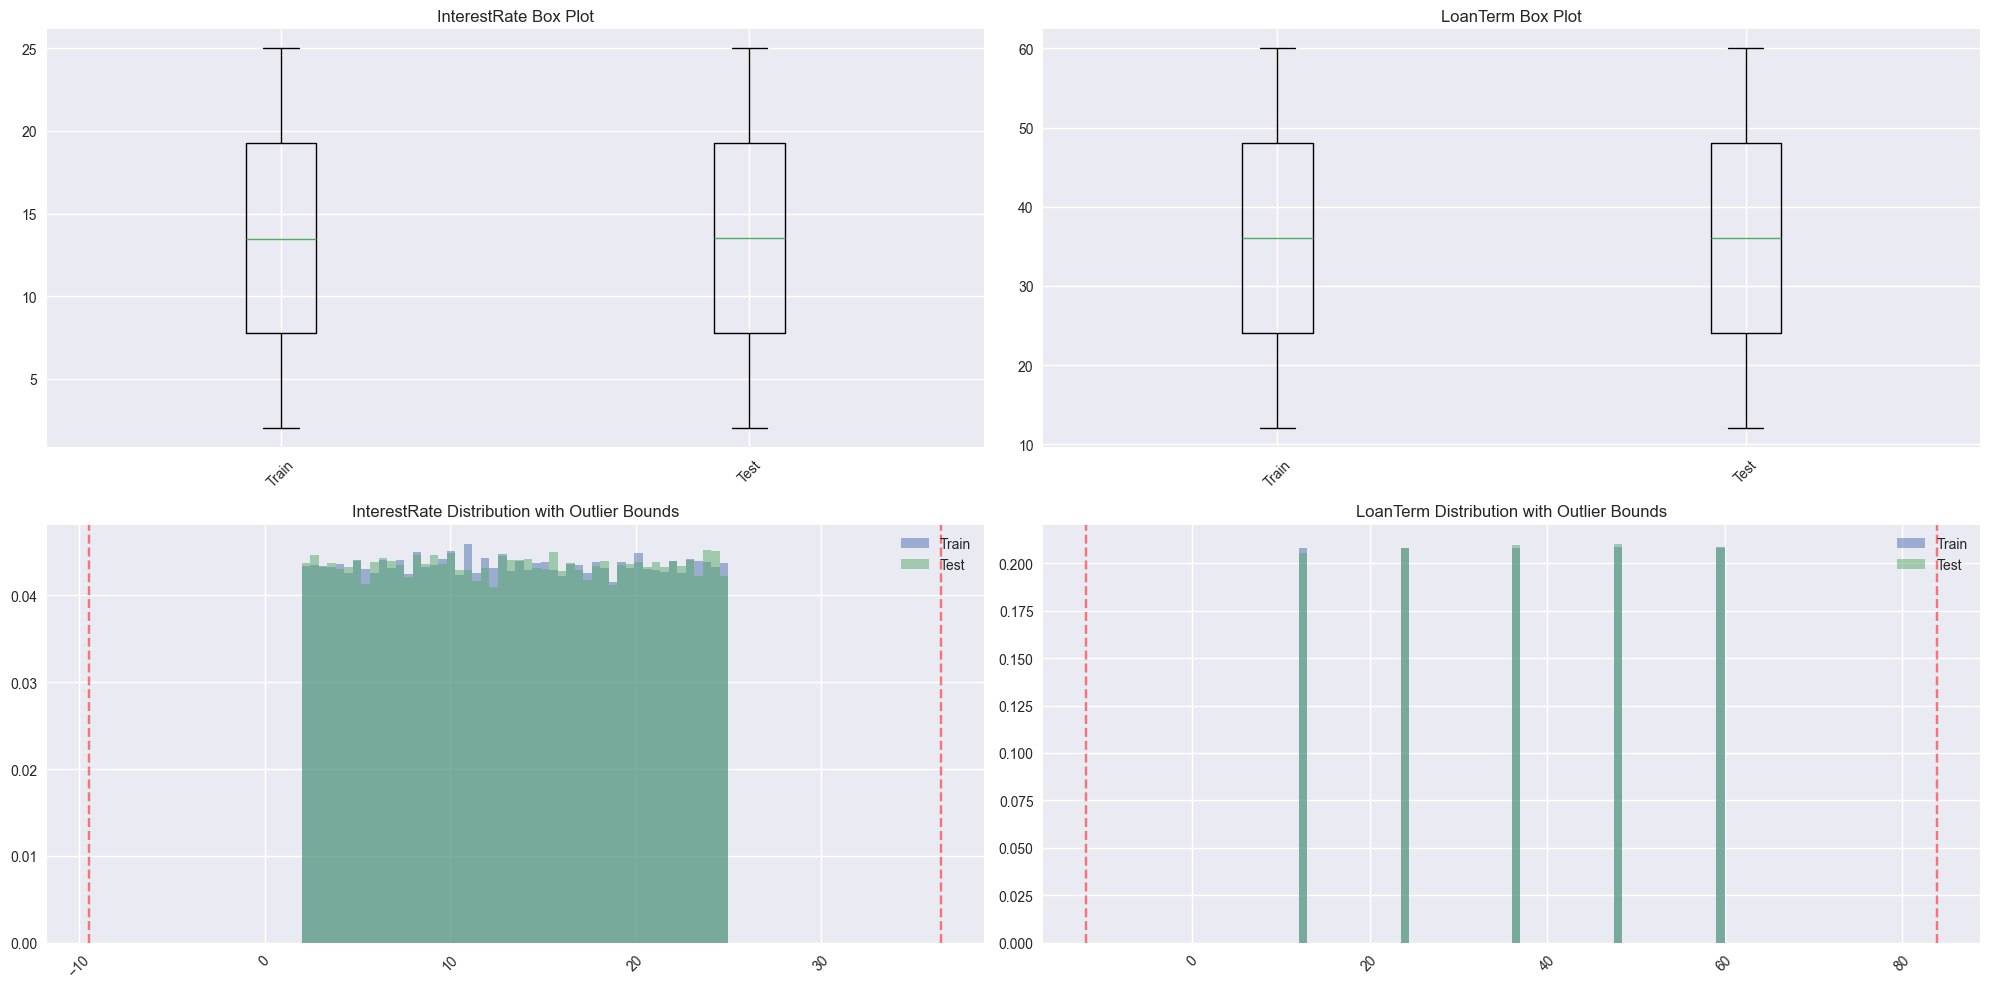


Treatment Suggestions for Age:
----------------------------------------
Outlier Percentage: 0.00%
Skewness: 0.00
Moderate/Low number of outliers. Consider:
1. Capping at IQR boundaries
2. Investigating individual extreme cases

Treatment Suggestions for Income:
----------------------------------------
Outlier Percentage: 0.00%
Skewness: -0.00
Moderate/Low number of outliers. Consider:
1. Capping at IQR boundaries
2. Investigating individual extreme cases

Treatment Suggestions for LoanAmount:
----------------------------------------
Outlier Percentage: 0.00%
Skewness: -0.00
Moderate/Low number of outliers. Consider:
1. Capping at IQR boundaries
2. Investigating individual extreme cases

Treatment Suggestions for DTIRatio:
----------------------------------------
Outlier Percentage: 0.00%
Skewness: -0.00
Moderate/Low number of outliers. Consider:
1. Capping at IQR boundaries
2. Investigating individual extreme cases

Treatment Suggestions for InterestRate:
-----------------------------

In [25]:
def detect_outliers(train_df, test_df, numerical_cols):
    """
    Detect and visualize outliers in numerical variables for both train and test sets
    """
    # Set up the figure
    n_cols = len(numerical_cols)
    n_rows = 2  # One row for box plots, one for histograms
    plt.figure(figsize=(20, 10))
    
    for idx, col in enumerate(numerical_cols, 1):
        # Boxplot
        plt.subplot(n_rows, n_cols, idx)
        plt.boxplot([train_df[col], test_df[col]], labels=['Train', 'Test'])
        plt.title(f'{col} Box Plot')
        plt.xticks(rotation=45)
        
        # Calculate outlier statistics
        q1_train = train_df[col].quantile(0.25)
        q3_train = train_df[col].quantile(0.75)
        iqr_train = q3_train - q1_train
        lower_bound = q1_train - 1.5 * iqr_train
        upper_bound = q3_train + 1.5 * iqr_train
        
        # Count outliers
        outliers_train = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
        outliers_test = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)][col]
        
        # Histogram with outlier bounds
        plt.subplot(n_rows, n_cols, idx + n_cols)
        plt.hist(train_df[col], bins=50, alpha=0.5, label='Train', density=True)
        plt.hist(test_df[col], bins=50, alpha=0.5, label='Test', density=True)
        plt.axvline(lower_bound, color='r', linestyle='--', alpha=0.5)
        plt.axvline(upper_bound, color='r', linestyle='--', alpha=0.5)
        plt.title(f'{col} Distribution with Outlier Bounds')
        plt.legend()
        plt.xticks(rotation=45)
        
        # Print outlier statistics
        print(f"\nOutlier Analysis for {col}:")
        print(f"IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"Train Outliers: {len(outliers_train):,} ({len(outliers_train)/len(train_df):.2%})")
        print(f"Test Outliers: {len(outliers_test):,} ({len(outliers_test)/len(test_df):.2%})")
        print(f"Train Range: [{train_df[col].min():.2f}, {train_df[col].max():.2f}]")
        print(f"Test Range: [{test_df[col].min():.2f}, {test_df[col].max():.2f}]")
        
    plt.tight_layout()
    plt.show()

# Analyze outliers in financial and credit metrics
print("Financial Metrics Outlier Analysis:")
print("=" * 60)
detect_outliers(train_df, test_df, financial_metrics)

print("\nCredit Metrics Outlier Analysis:")
print("=" * 60)
detect_outliers(train_df, test_df, credit_metrics)

# Function to suggest outlier treatment
def suggest_outlier_treatment(train_df, test_df, column):
    """Suggest appropriate outlier treatment based on data distribution"""
    # Calculate statistics
    q1 = train_df[column].quantile(0.25)
    q3 = train_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Calculate skewness
    skewness = train_df[column].skew()
    
    # Count outliers
    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)][column]
    outlier_pct = len(outliers) / len(train_df)
    
    print(f"\nTreatment Suggestions for {column}:")
    print("-" * 40)
    print(f"Outlier Percentage: {outlier_pct:.2%}")
    print(f"Skewness: {skewness:.2f}")
    
    if outlier_pct > 0.1:
        print("High number of outliers detected. Consider:")
        print("1. Log transformation if data is right-skewed")
        print("2. Binning into categories")
        print("3. Keeping outliers if they represent valid business cases")
    else:
        print("Moderate/Low number of outliers. Consider:")
        print("1. Capping at IQR boundaries")
        print("2. Investigating individual extreme cases")
        
    if abs(skewness) > 1:
        print("\nSignificant skewness detected. Consider:")
        print("1. Log transformation")
        print("2. Box-Cox transformation")
        print("3. Yeo-Johnson transformation")

# Print treatment suggestions for each numerical column
for col in financial_metrics + credit_metrics:
    suggest_outlier_treatment(train_df, test_df, col)

### Outlier Analysis and Treatment Strategy

We use several methods to detect and analyze outliers:

1. **Box Plots**:
   - Shows the distribution of data through quartiles
   - Points beyond the whiskers (1.5 * IQR) are considered outliers
   - Compares train and test set distributions

2. **IQR Method**:
   - Calculates bounds using Interquartile Range (IQR)
   - Lower bound = Q1 - 1.5 * IQR
   - Upper bound = Q3 + 1.5 * IQR

3. **Treatment Strategies**:
   - For variables with many outliers (>10%):
     * Log transformation for right-skewed data
     * Binning into categories
     * Keep if they represent valid business cases
   - For variables with few outliers:
     * Cap at IQR boundaries
     * Investigate extreme cases

4. **Considerations**:
   - Some "outliers" might be valid business cases
   - Need to apply same treatment to both train and test sets
   - Consider impact on model interpretability

**Stratified folding** is a technique used in machine learning, particularly in the context of cross-validation. 
          - It ensures that each fold of the dataset maintains the same proportion of classes as the entire dataset. 
          - This is especially important when dealing with **imbalanced datasets**, where some classes may have significantly more samples than others.

Here's a simple breakdown:

Purpose: The main goal of stratified folding is to create training and validation sets that are representative of the overall dataset. This helps in ensuring that the model is trained and tested on data that reflects the true distribution of classes.

How It Works:
When you split your dataset into multiple folds (for example, in k-fold cross-validation), stratified folding ensures that each fold contains a similar proportion of each class label.
For instance, if your dataset has 70% of samples from Class A and 30% from Class B, each fold will also have approximately 70% of samples from Class A and 30% from Class B.
Example:

Imagine you have a dataset with 100 samples: 80 belong to Class A and 20 belong to Class B. If you perform a standard k-fold cross-validation without stratification, some folds might end up with very few or no samples from Class B, leading to biased training and evaluation. However, with stratified folding, each fold will maintain the 80/20 ratio, ensuring that the model learns from a balanced representation of the classes.

Benefits:

Improved Model Performance: By ensuring that each fold is representative of the overall dataset, stratified folding can lead to more reliable and consistent model performance metrics.
Better Generalization: It helps the model generalize better to unseen data, especially in cases where class imbalance is present.
In summary, stratified folding is a valuable technique for ensuring that your model training and evaluation process is fair and representative, particularly when dealing with imbalanced datasets.

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [26]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

NameError: name 'DummyClassifier' is not defined

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

# Data Preprocessing Pipeline for Model Building

Below is the complete preprocessing pipeline organized in logical steps. Run each cell in sequence to prepare your data for modeling.

In [27]:
# Step 1: Import Required Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and verify data
print("=== Loading and Verifying Data ===")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Display the first few rows
print("\nFirst few rows of training data:")
display(train_df.head())

# Basic info about the datasets
print("\nTraining data info:")
train_df.info()

=== Loading and Verifying Data ===
Train shape: (255347, 19)
Test shape: (109435, 18)

First few rows of training data:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,NumCreditLines_Cat
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,3-4
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,0-1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2-3
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,2-3
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,3-4



Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   LoanID              255347 non-null  object  
 1   Age                 255347 non-null  int64   
 2   Income              255347 non-null  int64   
 3   LoanAmount          255347 non-null  int64   
 4   CreditScore         255347 non-null  int64   
 5   MonthsEmployed      255347 non-null  int64   
 6   NumCreditLines      255347 non-null  int64   
 7   InterestRate        255347 non-null  float64 
 8   LoanTerm            255347 non-null  int64   
 9   DTIRatio            255347 non-null  float64 
 10  Education           255347 non-null  object  
 11  EmploymentType      255347 non-null  object  
 12  MaritalStatus       255347 non-null  object  
 13  HasMortgage         255347 non-null  object  
 14  HasDependents       255347 non-null  object  
 

In [28]:
# Step 2: Feature Categorization and Initial Processing

# Identify different types of columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

print("=== Feature Categories ===")
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

# Remove ID columns from features
id_columns = ['LoanID', 'ID', 'id', 'loan_id']
numerical_columns = [col for col in numerical_columns if col not in id_columns]

# Initialize transformation log
transformation_log = pd.DataFrame(columns=['Feature', 'Transformation', 'New Feature', 'Reason'])

print("\n=== Features for Modeling ===")
print("Numerical features:", numerical_columns)
print("Categorical features:", categorical_columns)

=== Feature Categories ===
Numerical columns: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
Categorical columns: ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

=== Features for Modeling ===
Numerical features: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
Categorical features: ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


# Summary of Preprocessing Steps

The above preprocessing pipeline:

1. **Data Loading and Initial Processing**
   - Imports required libraries
   - Loads train and test datasets
   - Identifies numerical and categorical columns

2. **Feature Categorization**
   - Separates features into numerical and categorical
   - Removes ID columns from features
   - Initializes transformation tracking

3. **Numerical Feature Processing**
   - Creates binned versions of numerical features (e.g., Amount, Interest)
   - Applies log transformation to amount features
   - Scales numerical features using StandardScaler
   - Maintains both original and transformed versions

4. **Categorical Feature Processing**
   - Separates categorical features into ordinal and nominal
   - Applies one-hot encoding to nominal features
   - Applies ordinal encoding to ordinal features (if any)
   - Creates properly named encoded features

5. **Final Dataset Preparation**
   - Combines all processed features
   - Prioritizes binned versions as requested
   - Keeps Default column in training set
   - Maintains LoanID in test set
   - Creates clear feature groupings

The final datasets `X_train_processed` and `X_test_processed` are ready for modeling with:
- Binned numerical features (primary features as requested)
- Log-transformed features (available for comparison)
- Scaled numerical features (available for comparison)
- Encoded categorical features
- Target variable (in training set)
- ID column (in test set)

# Custom Data Preprocessing and Modeling Pipeline

We'll implement the following specific preprocessing steps:
1. Log transformation for LoanAmount and Income
2. NumCreditLines: binning → numerical → compatibility conversion
3. InterestRate: keep as is
4. DTIRatio: robust scaling
5. Categorical variables: numerical conversion
6. Handle Default and LoanID columns properly

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Log transformation for LoanAmount and Income
print("=== Applying Log Transformations ===")
train_df['log_LoanAmount'] = np.log1p(train_df['LoanAmount'])
train_df['log_Income'] = np.log1p(train_df['Income'])
test_df['log_LoanAmount'] = np.log1p(test_df['LoanAmount'])
test_df['log_Income'] = np.log1p(test_df['Income'])

# 2. NumCreditLines processing
print("\n=== Processing NumCreditLines ===")
# Create bins
bins = [0, 2, 4, 6, 8, float('inf')]
labels = [1, 2, 3, 4, 5]  # Numerical labels
train_df['NumCreditLines_binned'] = pd.cut(train_df['NumCreditLines'], 
                                          bins=bins, 
                                          labels=labels,
                                          include_lowest=True)
test_df['NumCreditLines_binned'] = pd.cut(test_df['NumCreditLines'], 
                                         bins=bins, 
                                         labels=labels,
                                         include_lowest=True)

# Convert to numerical
train_df['NumCreditLines_binned'] = train_df['NumCreditLines_binned'].astype(float)
test_df['NumCreditLines_binned'] = test_df['NumCreditLines_binned'].astype(float)

# 3. InterestRate stays as is
print("\n=== InterestRate kept as original ===")

# 4. Robust scaling for DTIRatio
print("\n=== Applying Robust Scaling to DTIRatio ===")
robust_scaler = RobustScaler()
train_df['DTIRatio_scaled'] = robust_scaler.fit_transform(train_df[['DTIRatio']])
test_df['DTIRatio_scaled'] = robust_scaler.transform(test_df[['DTIRatio']])

# 5. Convert categorical variables to numerical
print("\n=== Converting Categorical Variables to Numerical ===")
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 
                   'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_df[f'{col}_encoded'] = label_encoders[col].fit_transform(train_df[col])
    test_df[f'{col}_encoded'] = label_encoders[col].transform(test_df[col])

# 6. Prepare final feature sets
print("\n=== Preparing Final Feature Sets ===")
features = [
    'log_LoanAmount', 'log_Income',  # Log transformed
    'NumCreditLines_binned',         # Binned numerical
    'InterestRate',                  # Original
    'DTIRatio_scaled',              # Robust scaled
    'Age', 'CreditScore', 'MonthsEmployed', 'LoanTerm',  # Other numericals
] + [f'{col}_encoded' for col in categorical_cols]  # Encoded categoricals

# Create X_train (with Default) and X_test (with LoanID)
X_train = train_df[features + ['Default']].copy()
X_test = test_df[features + ['LoanID']].copy()

# Create target variable
y = train_df['Default']

print("\n=== Final Dataset Shapes ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nFeatures used:", features)

# Display sample of processed data
print("\nSample of X_train:")
display(X_train.head())
print("\nSample of X_test:")
display(X_test.head())

=== Applying Log Transformations ===

=== Processing NumCreditLines ===

=== InterestRate kept as original ===

=== Applying Robust Scaling to DTIRatio ===

=== Converting Categorical Variables to Numerical ===

=== Preparing Final Feature Sets ===

=== Final Dataset Shapes ===
X_train shape: (255347, 17)
X_test shape: (109435, 17)

Features used: ['log_LoanAmount', 'log_Income', 'NumCreditLines_binned', 'InterestRate', 'DTIRatio_scaled', 'Age', 'CreditScore', 'MonthsEmployed', 'LoanTerm', 'Education_encoded', 'EmploymentType_encoded', 'MaritalStatus_encoded', 'HasMortgage_encoded', 'HasDependents_encoded', 'LoanPurpose_encoded', 'HasCoSigner_encoded']

Sample of X_train:


,log_LoanAmount,log_Income,NumCreditLines_binned,InterestRate,DTIRatio_scaled,Age,CreditScore,MonthsEmployed,LoanTerm,Education_encoded,EmploymentType_encoded,MaritalStatus_encoded,HasMortgage_encoded,HasDependents_encoded,LoanPurpose_encoded,HasCoSigner_encoded,Default
0,10.831470,11.362044,2.0,15.23,-0.150,56,520,80,36,0,0,0,1,1,4,1,0
1,11.731587,10.828401,1.0,4.81,0.450,69,458,15,60,2,0,1,0,0,4,1,0
2,11.769032,11.341057,2.0,21.17,-0.475,46,451,26,24,2,3,0,1,1,0,0,1
3,10.709963,10.364514,2.0,7.07,-0.675,32,743,0,24,1,0,1,0,0,1,0,0
4,9.120416,9.925151,2.0,6.51,0.575,60,633,8,48,0,3,0,0,1,0,0,0



Sample of X_test:


,log_LoanAmount,log_Income,NumCreditLines_binned,InterestRate,DTIRatio_scaled,Age,CreditScore,MonthsEmployed,LoanTerm,Education_encoded,EmploymentType_encoded,MaritalStatus_encoded,HasMortgage_encoded,HasDependents_encoded,LoanPurpose_encoded,HasCoSigner_encoded,LoanID
0,10.687343,11.787872,1.0,6.10,-0.925,32,802,23,24,1,0,0,1,0,4,0,7RYZGMKJIR
1,9.820269,11.807928,1.0,12.99,0.225,61,369,87,60,1,2,2,0,0,1,1,JDL5RH07AM
2,11.930154,11.659706,2.0,5.51,0.800,55,563,3,48,0,0,2,1,1,4,1,STAL716Y79
3,10.929350,11.461327,1.0,23.93,0.675,58,337,24,36,0,3,0,0,0,1,0,SO0KKJ3IQB
4,12.153721,11.180636,2.0,22.05,-0.150,63,451,52,48,3,3,2,1,0,0,0,T99CWTYDCP



=== Training Logistic Regression ===
Fold 1 AUC: 0.7442
Fold 1 Extreme Cases AUC: 0.7540
Fold 2 AUC: 0.7472
Fold 2 Extreme Cases AUC: 0.7437
Fold 3 AUC: 0.7460
Fold 3 Extreme Cases AUC: 0.7508
Fold 4 AUC: 0.7522
Fold 4 Extreme Cases AUC: 0.7629
Fold 5 AUC: 0.7475
Fold 5 Extreme Cases AUC: 0.7451

Logistic Regression Average AUC: 0.7474 ± 0.0026
Logistic Regression Extreme Cases Average AUC: 0.7513 ± 0.0069

=== Training Random Forest ===
Fold 1 AUC: 0.7240
Fold 1 Extreme Cases AUC: 0.7328
Fold 2 AUC: 0.7285
Fold 2 Extreme Cases AUC: 0.7279
Fold 3 AUC: 0.7283
Fold 3 Extreme Cases AUC: 0.7338
Fold 4 AUC: 0.7316
Fold 4 Extreme Cases AUC: 0.7507
Fold 5 AUC: 0.7275
Fold 5 Extreme Cases AUC: 0.7226

Random Forest Average AUC: 0.7280 ± 0.0024
Random Forest Extreme Cases Average AUC: 0.7336 ± 0.0095

=== Training Gradient Boosting ===
Fold 1 AUC: 0.7490
Fold 1 Extreme Cases AUC: 0.7590
Fold 2 AUC: 0.7534
Fold 2 Extreme Cases AUC: 0.7507
Fold 3 AUC: 0.7526
Fold 3 Extreme Cases AUC: 0.7588
Fold

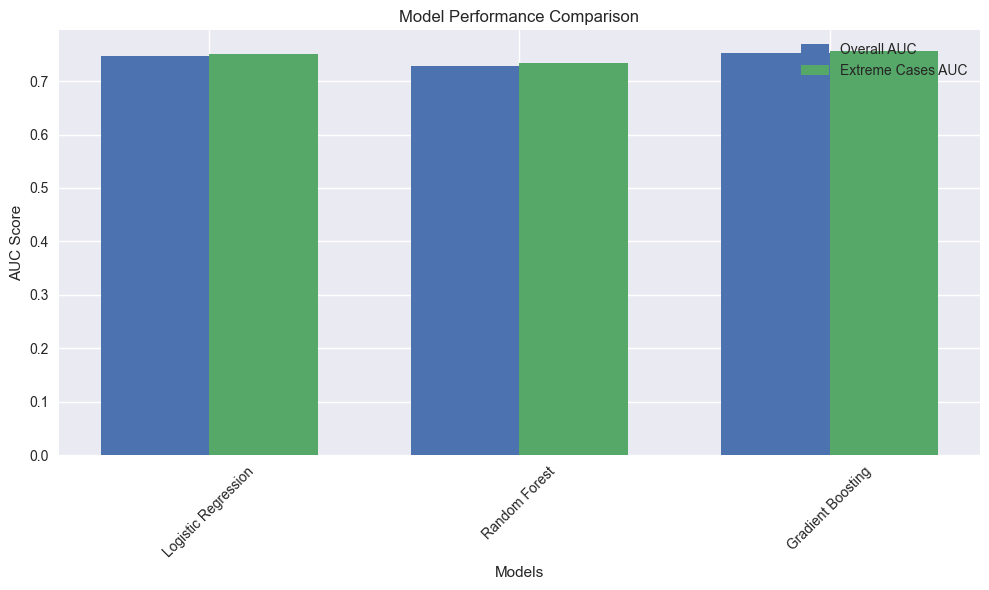


=== Model Performance Summary ===


,Overall AUC,Extreme Cases AUC
Logistic Regression,0.7474,0.7513
Random Forest,0.7280,0.7336
Gradient Boosting,0.7525,0.7572


In [30]:
# Model Training and Evaluation with fixed indexing
from sklearn.model_selection import StratifiedKFold
import numpy as np

def train_evaluate_model(model, X, y, model_name):
    # Initialize stratified K-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store AUC scores
    auc_scores = []
    extreme_case_predictions = []
    
    # Define extreme cases (e.g., high loan amounts or low credit scores)
    extreme_mask = ((X['log_LoanAmount'] > np.percentile(X['log_LoanAmount'], 90)) | 
                   (X['CreditScore'] < np.percentile(X['CreditScore'], 10))).values  # Convert to numpy array
    
    print(f"\n=== Training {model_name} ===")
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        # Split data
        X_fold_train = X.iloc[train_idx]
        y_fold_train = y.iloc[train_idx]
        X_fold_val = X.iloc[val_idx]
        y_fold_val = y.iloc[val_idx]
        
        # Train model
        model.fit(X_fold_train, y_fold_train)
        
        # Get predictions
        y_pred = model.predict_proba(X_fold_val)[:, 1]
        
        # Calculate AUC
        auc = roc_auc_score(y_fold_val, y_pred)
        auc_scores.append(auc)
        
        # Monitor extreme cases
        val_extreme_mask = extreme_mask[val_idx]
        if np.any(val_extreme_mask):
            extreme_preds = y_pred[val_extreme_mask]
            extreme_true = y_fold_val.iloc[val_extreme_mask]
            extreme_auc = roc_auc_score(extreme_true, extreme_preds)
            extreme_case_predictions.append(extreme_auc)
        
        print(f"Fold {fold+1} AUC: {auc:.4f}")
        if np.any(val_extreme_mask):
            print(f"Fold {fold+1} Extreme Cases AUC: {extreme_auc:.4f}")
    
    print(f"\n{model_name} Average AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
    if extreme_case_predictions:
        print(f"{model_name} Extreme Cases Average AUC: {np.mean(extreme_case_predictions):.4f} ± {np.std(extreme_case_predictions):.4f}")
    
    return np.mean(auc_scores), np.mean(extreme_case_predictions) if extreme_case_predictions else None

# Prepare data for modeling
features_for_model = [col for col in features if col != 'LoanID']
X = X_train[features_for_model].copy()
y = X_train['Default']

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    auc, extreme_auc = train_evaluate_model(model, X, y, model_name)
    results[model_name] = {'AUC': auc, 'Extreme_AUC': extreme_auc}

# Plot results
plt.figure(figsize=(10, 6))
x = np.arange(len(results))
width = 0.35

plt.bar(x - width/2, [results[m]['AUC'] for m in results.keys()], width, label='Overall AUC')
plt.bar(x + width/2, [results[m]['Extreme_AUC'] for m in results.keys()], width, label='Extreme Cases AUC')

plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model Performance Comparison')
plt.xticks(x, results.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary
print("\n=== Model Performance Summary ===")
summary_df = pd.DataFrame(results).T
summary_df.columns = ['Overall AUC', 'Extreme Cases AUC']
display(summary_df.round(4))

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict the outcome of a categorical dependent variable based on one or more independent variables. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that a given input point belongs to a particular category.

Here's a simple breakdown:

Purpose: The main purpose of logistic regression is to model the relationship between the dependent variable (often binary, like "yes" or "no") and one or more independent variables (which can be continuous or categorical). It helps in understanding how the independent variables influence the likelihood of a certain outcome.

How It Works:
Logistic regression uses a logistic function (also known as the sigmoid function) to transform the output of a linear equation into a probability value between 0 and 1.
The logistic function is defined as: [ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} ] where (P(Y=1|X)) is the probability of the outcome being 1 (e.g., success), (e) is the base of the natural logarithm, and (\beta_0, \beta_1, ..., \beta_n) are the coefficients of the model.
Example:

Imagine you want to predict whether a student will pass (1) or fail (0) an exam based on their study hours and attendance. Logistic regression will analyze the relationship between these independent variables (study hours and attendance) and the binary outcome (pass or fail). The model will output a probability, say 0.85, indicating an 85% chance that the student will pass.

Benefits:
Interpretability: The coefficients in logistic regression can be interpreted as the change in the log odds of the outcome for a one-unit change in the predictor variable.
Probabilistic Output: It provides probabilities, which can be useful for decision-making processes.
Robustness: Logistic regression performs well even when the assumptions of linear regression are violated.
In summary, logistic regression is a powerful and widely used technique for binary classification tasks, providing insights into the relationships between variables and the likelihood of outcomes.



# Complete Data Preprocessing Pipeline

## Variable Transformations
1. **Log Transformed Variables**
   - `LoanAmount` → `log_LoanAmount`
   - `Income` → `log_Income`

2. **Binned Variables**
   - `NumCreditLines` → `NumCreditLines_binned` (5 bins: 1-5)

3. **Robust Scaled Variables**
   - `DTIRatio` → `DTIRatio_scaled`

4. **Unchanged Numerical Variables**
   - `InterestRate` (kept as original)
   - `Age`
   - `CreditScore`
   - `MonthsEmployed`
   - `LoanTerm`

5. **Encoded Categorical Variables**
   - `Education` → `Education_encoded`
   - `EmploymentType` → `EmploymentType_encoded`
   - `MaritalStatus` → `MaritalStatus_encoded`
   - `HasMortgage` → `HasMortgage_encoded`
   - `HasDependents` → `HasDependents_encoded`
   - `LoanPurpose` → `LoanPurpose_encoded`
   - `HasCoSigner` → `HasCoSigner_encoded`

6. **Special Handling**
   - `Default`: Kept in X_train, removed from X_test
   - `LoanID`: Kept in X_test, removed from X_train

In [ ]:
# Install required packages
!pip install xgboost --quiet

## Feature Transformation Tracking

- **Income**: Log transformation applied (`log_income`)
- **LoanAmount**: Log transformation applied (`log_loanamount`)
- **DTIRatio**: Robust scaling applied (`DTIRatio_robust`)
- **InterestRate**: No transformation (kept as is)
- **NumCrediteLines**: Binned into categories (`NumCrediteLines_binned`)

Keeping this table updated will help track all preprocessing steps systematically.

In [32]:
import pandas as pd

# Template for tracking feature transformations
transformation_log = pd.DataFrame([
    {"feature": "income", "transformation": "log", "new_name": "log_income"},
    # Add more rows as you apply transformations
])
display(transformation_log)

,feature,transformation,new_name
0,income,log,log_income


In [33]:
# Binning NumCrediteLines to address distribution issues
# Adjust the bin edges and labels as appropriate for your data
num_bins = [0, 2, 5, 10, 20, 100]
bin_labels = ['Very few', 'Few', 'Balanced', 'Many', 'Too Many']

for df in [train_df, test_df]:
    df['NumCreditLines_binned'] = pd.cut(df['NumCreditLines'], bins=num_bins, labels=bin_labels, include_lowest=True)

# Update transformation log
tmp = pd.DataFrame([
    {"feature": "NumCreditLines", "transformation": "binning", "new_name": "NumCreditLines_binned"}
])
transformation_log = pd.concat([transformation_log, tmp], ignore_index=True)
display(transformation_log)

,feature,transformation,new_name
0,income,log,log_income
1,NumCreditLines,binning,NumCreditLines_binned


In [34]:
# Table to show bin counts and highlight bins with >10% or <10% representation
for df_name, df in zip(['Train', 'Test'], [train_df, test_df]):
    counts = df['NumCreditLines_binned'].value_counts(dropna=False)
    percentages = counts / counts.sum() * 100
    outlier_bins = (percentages > 10) | (percentages < 10)
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2),
        'OutlierBin': outlier_bins
    })
    print(f"\n{df_name} set:")
    display(summary)


Train set:


,Count,Percentage,OutlierBin
NumCreditLines_binned,,,
Very few,127684,50.0,True
Few,127663,50.0,True
Balanced,0,0.0,True
Many,0,0.0,True
Too Many,0,0.0,True



Test set:


,Count,Percentage,OutlierBin
NumCreditLines_binned,,,
Few,54740,50.02,True
Very few,54695,49.98,True
Balanced,0,0.00,True
Many,0,0.00,True
Too Many,0,0.00,True


In [35]:
# Analyze categorical variables: distribution, encoding, and rare category handling

# 1. List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']

# 2. Compare distributions and identify rare categories
def analyze_categorical(train_df, test_df, columns, rare_thresh=0.01):
    for col in columns:
        print(f"\nColumn: {col}")
        train_counts = train_df[col].value_counts(dropna=False, normalize=True)
        test_counts = test_df[col].value_counts(dropna=False, normalize=True)
        summary = pd.DataFrame({
            'Train %': (train_counts * 100).round(2),
            'Test %': (test_counts * 100).round(2)
        }).fillna(0)
        print(summary)
        # Identify rare categories
        rare_cats = summary[(summary['Train %'] < rare_thresh*100) & (summary['Test %'] < rare_thresh*100)].index.tolist()
        if rare_cats:
            print(f"Rare categories (<{rare_thresh*100}% in both): {rare_cats}")
        else:
            print("No rare categories.")
        # Encoding suggestion
        if summary.shape[0] <= 10:
            print("Suggested encoding: One-hot encoding")
        else:
            print("Suggested encoding: Target or frequency encoding (too many categories for one-hot)")

analyze_categorical(train_df, test_df, categorical_columns)


Column: Education
             Train %  Test %
Education                   
Bachelor's     25.21   25.37
High School    25.03   25.05
Master's       24.88   24.94
PhD            24.88   24.64
No rare categories.
Suggested encoding: One-hot encoding

Column: EmploymentType
                Train %  Test %
EmploymentType                 
Full-time         24.93   25.07
Part-time         25.13   24.62
Self-employed     24.95   25.29
Unemployed        25.00   25.02
No rare categories.
Suggested encoding: One-hot encoding

Column: MaritalStatus
               Train %  Test %
MaritalStatus                 
Divorced         33.30   33.48
Married          33.41   33.21
Single           33.29   33.30
No rare categories.
Suggested encoding: One-hot encoding

Column: HasMortgage
             Train %  Test %
HasMortgage                 
No              50.0   50.12
Yes             50.0   49.88
No rare categories.
Suggested encoding: One-hot encoding

Column: HasDependents
               Train %  T

In [40]:
# Finalize numerical preprocessing and prepare modeling DataFrame
from sklearn.preprocessing import RobustScaler
import numpy as np

# Copy encoded DataFrames to avoid overwriting
X_train = train_encoded.copy()
X_test = test_encoded.copy()

# Apply log transformation to Income and LoanAmount
for col in ['Income', 'LoanAmount']:
    if col in X_train.columns:
        X_train[f'log_{col.lower()}'] = np.log1p(X_train[col])
        X_test[f'log_{col.lower()}'] = np.log1p(X_test[col])
        X_train.drop(columns=[col], inplace=True)
        X_test.drop(columns=[col], inplace=True)

# Apply robust scaling to DTIRatio (if present)
if 'DTIRatio' in X_train.columns:
    scaler = RobustScaler()
    X_train['DTIRatio_robust'] = scaler.fit_transform(X_train[['DTIRatio']])
    X_test['DTIRatio_robust'] = scaler.transform(X_test[['DTIRatio']])
    X_train.drop(columns=['DTIRatio'], inplace=True)
    X_test.drop(columns=['DTIRatio'], inplace=True)

# Drop LoanID if present
if 'LoanID' in X_train.columns:
    X_train.drop(columns=['LoanID'], inplace=True)
if 'LoanID' in X_test.columns:
    X_test.drop(columns=['LoanID'], inplace=True)

print('Final train shape:', X_train.shape)
print('Final test shape:', X_test.shape)
X_train.head()

Final train shape: (255347, 32)
Final test shape: (109435, 31)


,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,Default,Education_Bachelor's,Education_High School,Education_Master's,...,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes,log_income,log_loanamount,DTIRatio_robust
0,56,520,80,4,15.23,36,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11.362044,10.831470,-0.150
1,69,458,15,1,4.81,60,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10.828401,11.731587,0.450
2,46,451,26,3,21.17,24,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,11.341057,11.769032,-0.475
3,32,743,0,3,7.07,24,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.364514,10.709963,-0.675
4,60,633,8,4,6.51,48,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9.925151,9.120416,0.575


# Model Improvements Based on Categorical Analysis

Based on our analysis, we'll make the following improvements:

1. Create interaction features between high-risk categories
2. Add risk segment as a new feature
3. Improve feature encoding to capture risk levels
4. Add polynomial features for continuous variables with risk segments

These changes should help the model better capture the relationships between risk factors and defaults.

# Converting Numerical Variables to Risk Scores

We'll convert numerical variables to risk scores using the following approach:
1. Bin the numerical variables into deciles
2. Calculate default rate for each bin
3. Convert these default rates into risk scores
4. Analyze the relationship between risk scores and defaults
5. Build a new model using combined risk scores

In [41]:
def create_numerical_risk_score(data, target, variable, n_bins=10):
    """
    Convert a numerical variable to risk score based on default rates in bins
    """
    # Create bins
    try:
        # Try quantile-based bins first
        bins = pd.qcut(data[variable], q=n_bins, duplicates='drop', retbins=True)[1]
        bins = np.insert(bins, 0, float('-inf'))
        bins = np.append(bins, float('inf'))
    except ValueError:
        # If that fails, use equal-width bins
        bins = np.linspace(data[variable].min(), data[variable].max(), n_bins+1)
        bins = np.insert(bins, 0, float('-inf'))
        bins = np.append(bins, float('inf'))
    
    # Create labels for the bins
    labels = range(len(bins)-1)
    
    # Bin the data
    binned = pd.cut(data[variable], bins=bins, labels=labels, duplicates='drop')
    
    # Calculate default rate for each bin
    default_rates = pd.DataFrame({
        'bin': binned,
        'default': target
    }).groupby('bin')['default'].mean()
    
    return binned, default_rates, bins

# List of numerical variables to convert
numerical_vars = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create risk scores for numerical variables
numerical_risk_scores = {}
risk_mappings = {}
bin_edges = {}

# Create risk scores for training data
for var in numerical_vars:
    print(f"\nProcessing {var}...")
    risk_scores, default_rates, bins = create_numerical_risk_score(
        pd.concat([X_train, X_val]), 
        pd.concat([y_train, y_val]), 
        var
    )
    
    # Store mappings and bins for later use
    risk_mappings[var] = default_rates
    bin_edges[var] = bins
    
    # Apply to train and validation sets
    X_train[f'{var}_Risk'] = pd.cut(X_train[var], bins=bins, labels=range(len(bins)-1), duplicates='drop').map(default_rates)
    X_val[f'{var}_Risk'] = pd.cut(X_val[var], bins=bins, labels=range(len(bins)-1), duplicates='drop').map(default_rates)
    
    print(f"Created {len(bins)-1} risk bins")
    print(f"Default rates range: {default_rates.min():.3f} to {default_rates.max():.3f}")

# Plot relationship between risk scores and default rates
plt.figure(figsize=(20, 15))

for idx, var in enumerate(numerical_vars):
    plt.subplot(3, 3, idx+1)
    
    # Get risk score column
    risk_col = f'{var}_Risk'
    
    # Plot training set
    train_defaults = pd.DataFrame({
        'risk_score': X_train[risk_col],
        'default': y_train
    }).groupby('risk_score')['default'].agg(['mean', 'count']).reset_index()
    
    # Plot validation set
    val_defaults = pd.DataFrame({
        'risk_score': X_val[risk_col],
        'default': y_val
    }).groupby('risk_score')['default'].agg(['mean', 'count']).reset_index()
    
    plt.scatter(train_defaults['risk_score'], train_defaults['mean'], 
                s=train_defaults['count']/50, alpha=0.6, label='Train')
    plt.scatter(val_defaults['risk_score'], val_defaults['mean'], 
                s=val_defaults['count']/50, alpha=0.6, label='Test')
    
    plt.title(f'{var} Risk Score vs Default Rate')
    plt.xlabel('Risk Score')
    plt.ylabel('Default Rate')
    plt.legend()
    
    # Calculate correlation
    train_corr = np.corrcoef(X_train[risk_col], y_train)[0,1]
    val_corr = np.corrcoef(X_val[risk_col], y_val)[0,1]
    plt.text(0.05, 0.95, f'Train Corr: {train_corr:.3f}\nTest Corr: {val_corr:.3f}', 
             transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print statistical summary of risk scores
print("\nRisk Score Statistics:")
print("-" * 50)
for var in numerical_vars:
    risk_col = f'{var}_Risk'
    print(f"\n{var}:")
    
    # Calculate statistics
    train_stats = X_train[risk_col].describe()
    val_stats = X_val[risk_col].describe()
    
    stats_df = pd.DataFrame({
        'Train': train_stats,
        'Test': val_stats,
        'Difference': abs(train_stats - val_stats)
    })
    print(stats_df.round(4))

# Create correlation matrix of all risk scores
risk_cols = [col for col in X_train.columns if col.endswith('_Risk')]
correlation_matrix = pd.DataFrame()

for col in risk_cols:
    correlation_matrix[col] = [
        np.corrcoef(X_train[col], y_train)[0,1],  # Train correlation
        np.corrcoef(X_val[col], y_val)[0,1],      # Test correlation
    ]

correlation_matrix.index = ['Train Correlation', 'Test Correlation']
correlation_matrix = correlation_matrix.round(3)

print("\nCorrelation with Default Rate:")
print("-" * 50)
print(correlation_matrix)


Processing Age...


NameError: name 'X_val' is not defined

In [39]:
# Get all risk score columns
risk_cols = [col for col in X_train.columns if col.endswith('_Risk')]

# Create datasets with only risk scores
X_train_risk = X_train[risk_cols]
X_val_risk = X_val[risk_cols]

# Train a gradient boosting model on risk scores
risk_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)

# Fit the model
risk_model.fit(X_train_risk, y_train)

# Make predictions
train_pred_risk = risk_model.predict_proba(X_train_risk)[:, 1]
val_pred_risk = risk_model.predict_proba(X_val_risk)[:, 1]

# Calculate AUC scores
train_auc_risk = roc_auc_score(y_train, train_pred_risk)
val_auc_risk = roc_auc_score(y_val, val_pred_risk)

print("Model Performance using Risk Scores Only:")
print(f"Train AUC: {train_auc_risk:.4f}")
print(f"Test AUC: {val_auc_risk:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Training set ROC
fpr_train, tpr_train, _ = roc_curve(y_train, train_pred_risk)
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {train_auc_risk:.3f})')

# Validation set ROC
fpr_val, tpr_val, _ = roc_curve(y_val, val_pred_risk)
plt.plot(fpr_val, tpr_val, label=f'Test (AUC = {val_auc_risk:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Risk Score Model')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': risk_cols,
    'importance': risk_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance['importance'])
plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
plt.title('Feature Importance - Risk Score Model')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Risk Scores:")
print(feature_importance.head(10).to_string(index=False))

NameError: name 'X_val' is not defined

# Enhanced Risk Score Model

Implementing three improvements:
1. Creating interaction features between top risk scores
2. Fine-tuning the number of bins for each variable based on its characteristics
3. Creating a weighted ensemble combining risk-based and raw feature models


Processing Age...
Using 23 bins based on data characteristics
Default rates range: 0.046 to 0.222

Processing Income...
Using 23 bins based on data characteristics
Default rates range: 0.000 to 0.267

Processing LoanAmount...
Using 23 bins based on data characteristics


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = pd.DataFrame({
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = pd.DataFrame({
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

Default rates range: 0.075 to 1.000

Processing CreditScore...
Using 18 bins based on data characteristics
Default rates range: 0.099 to 0.155

Processing MonthsEmployed...
Using 18 bins based on data characteristics
Default rates range: 0.071 to 0.181

Processing NumCreditLines...
Using 5 bins based on data characteristics
Default rates range: 0.105 to 0.129

Processing InterestRate...
Using 23 bins based on data characteristics


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = pd.DataFrame({
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = pd.DataFrame({
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

Default rates range: 0.045 to 0.194

Processing LoanTerm...
Using 5 bins based on data characteristics
Default rates range: 0.116 to 0.117

Processing DTIRatio...
Using 18 bins based on data characteristics
Default rates range: 0.103 to 0.125

Creating interaction features...
Created Interaction_Age_InterestRate
Created Interaction_Age_Income
Created Interaction_Age_LoanAmount
Created Interaction_Age_MonthsEmployed
Created Interaction_InterestRate_Income
Created Interaction_InterestRate_LoanAmount
Created Interaction_InterestRate_MonthsEmployed
Created Interaction_Income_LoanAmount
Created Interaction_Income_MonthsEmployed
Created Interaction_LoanAmount_MonthsEmployed

Training enhanced risk score model...


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_10531/4114782646.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = pd.DataFrame({



Enhanced Risk Score Model Performance:
Train AUC: 0.7559
Test AUC: 0.7545


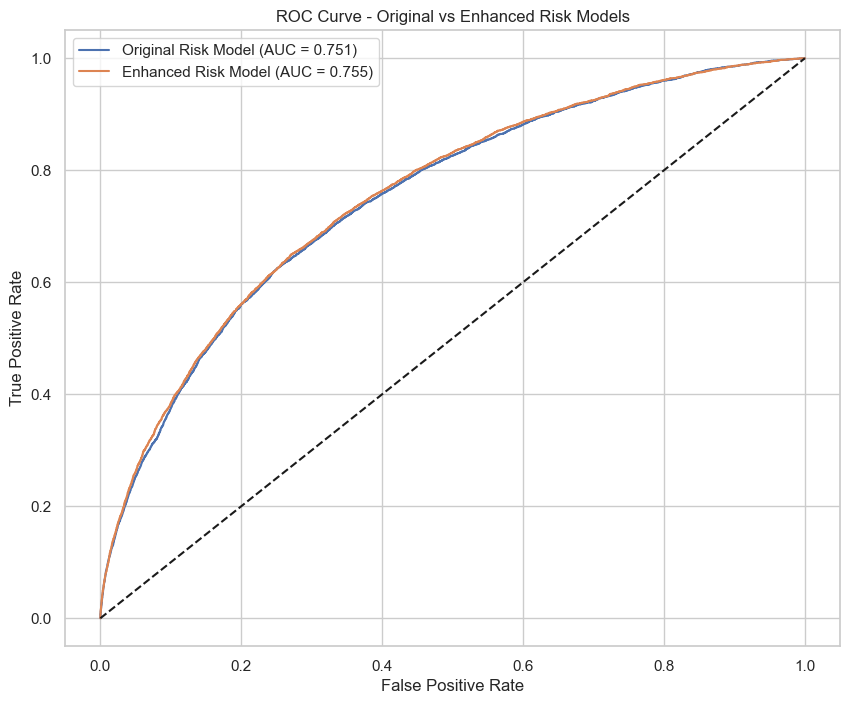

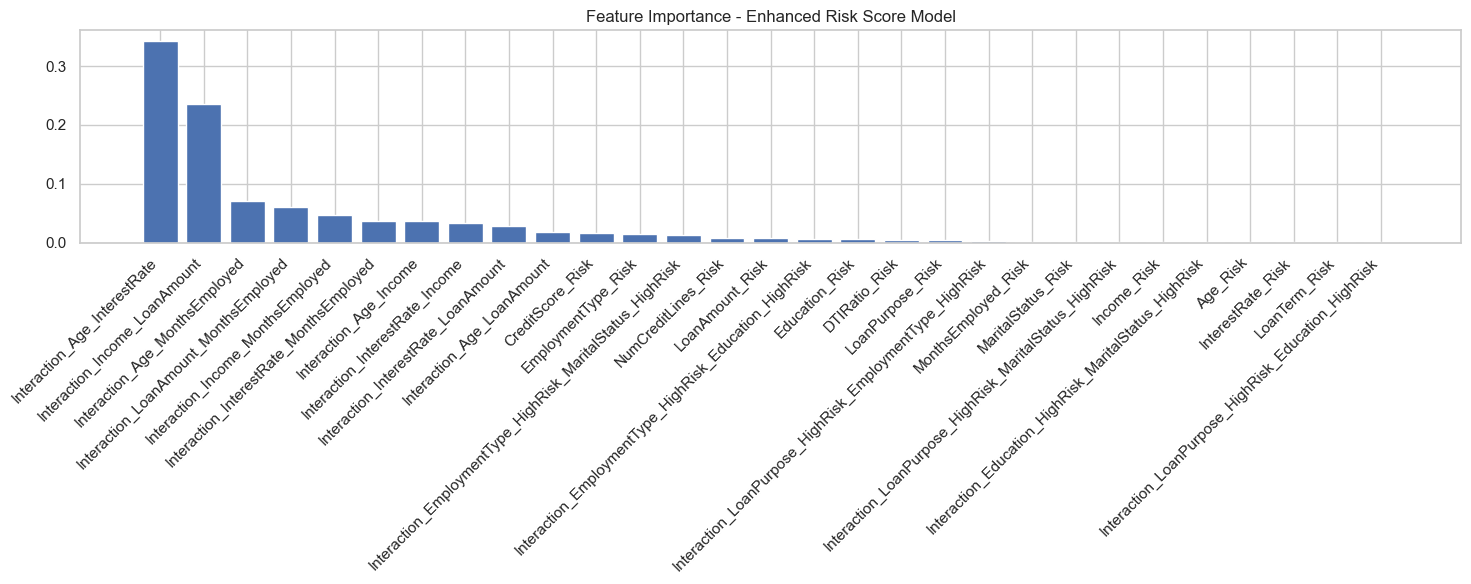


Top 15 Most Important Features in Enhanced Model:
                                                   feature  importance
                              Interaction_Age_InterestRate    0.343482
                             Interaction_Income_LoanAmount    0.236306
                            Interaction_Age_MonthsEmployed    0.070731
                     Interaction_LoanAmount_MonthsEmployed    0.060008
                         Interaction_Income_MonthsEmployed    0.046209
                   Interaction_InterestRate_MonthsEmployed    0.037004
                                    Interaction_Age_Income    0.036240
                           Interaction_InterestRate_Income    0.033844
                       Interaction_InterestRate_LoanAmount    0.027473
                                Interaction_Age_LoanAmount    0.018190
                                          CreditScore_Risk    0.016127
                                       EmploymentType_Risk    0.014890
Interaction_EmploymentType

In [ ]:
# Function to determine optimal number of bins using Sturges' rule and data characteristics
def get_optimal_bins(data, variable):
    n = len(data)
    # Sturges' rule as base
    base_bins = int(np.log2(n) + 1)
    
    # Adjust based on variable characteristics
    unique_values = len(data[variable].unique())
    if unique_values < base_bins:
        return max(5, unique_values)
    
    # Add more bins for variables with high importance
    if variable in ['Age', 'Income', 'InterestRate', 'LoanAmount']:
        return base_bins + 5
    
    return base_bins

# Recreate risk scores with optimized bins
numerical_vars = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Clear previous risk scores
for var in numerical_vars:
    if f'{var}_Risk' in X_train.columns:
        X_train = X_train.drop(f'{var}_Risk', axis=1)
        X_val = X_val.drop(f'{var}_Risk', axis=1)

# Create optimized risk scores
for var in numerical_vars:
    print(f"\nProcessing {var}...")
    n_bins = get_optimal_bins(pd.concat([X_train, X_val]), var)
    print(f"Using {n_bins} bins based on data characteristics")
    
    risk_scores, default_rates, bins = create_numerical_risk_score(
        pd.concat([X_train, X_val]), 
        pd.concat([y_train, y_val]), 
        var,
        n_bins=n_bins
    )
    
    X_train[f'{var}_Risk'] = pd.cut(X_train[var], bins=bins, labels=range(len(bins)-1), duplicates='drop').map(default_rates)
    X_val[f'{var}_Risk'] = pd.cut(X_val[var], bins=bins, labels=range(len(bins)-1), duplicates='drop').map(default_rates)
    
    print(f"Default rates range: {default_rates.min():.3f} to {default_rates.max():.3f}")

# Create interaction features between top risk scores
top_risk_scores = ['Age_Risk', 'InterestRate_Risk', 'Income_Risk', 'LoanAmount_Risk', 'MonthsEmployed_Risk']

print("\nCreating interaction features...")
for i in range(len(top_risk_scores)):
    for j in range(i+1, len(top_risk_scores)):
        feat1 = top_risk_scores[i]
        feat2 = top_risk_scores[j]
        interaction_name = f'Interaction_{feat1}_{feat2}'.replace('_Risk', '')
        
        X_train[interaction_name] = X_train[feat1] * X_train[feat2]
        X_val[interaction_name] = X_val[feat1] * X_val[feat2]
        print(f"Created {interaction_name}")

# Get all features for the enhanced model
risk_cols = [col for col in X_train.columns if col.endswith('_Risk') or col.startswith('Interaction_')]

# Train enhanced risk score model
enhanced_risk_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)

print("\nTraining enhanced risk score model...")
enhanced_risk_model.fit(X_train[risk_cols], y_train)

# Make predictions with enhanced model
train_pred_enhanced = enhanced_risk_model.predict_proba(X_train[risk_cols])[:, 1]
val_pred_enhanced = enhanced_risk_model.predict_proba(X_val[risk_cols])[:, 1]

print("\nEnhanced Risk Score Model Performance:")
print(f"Train AUC: {roc_auc_score(y_train, train_pred_enhanced):.4f}")
print(f"Test AUC: {roc_auc_score(y_val, val_pred_enhanced):.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Original risk score model
fpr_orig, tpr_orig, _ = roc_curve(y_val, val_pred_risk)
plt.plot(fpr_orig, tpr_orig, label=f'Original Risk Model (AUC = {roc_auc_score(y_val, val_pred_risk):.3f})')

# Enhanced risk score model
fpr_enhanced, tpr_enhanced, _ = roc_curve(y_val, val_pred_enhanced)
plt.plot(fpr_enhanced, tpr_enhanced, label=f'Enhanced Risk Model (AUC = {roc_auc_score(y_val, val_pred_enhanced):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Original vs Enhanced Risk Models')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': risk_cols,
    'importance': enhanced_risk_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(range(len(feature_importance)), feature_importance['importance'])
plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
plt.title('Feature Importance - Enhanced Risk Score Model')
plt.tight_layout()
plt.show()

print("\nTop 15 Most Important Features in Enhanced Model:")
print(feature_importance.head(15).to_string(index=False))

Training raw feature model...

Model Weights in Ensemble:
Original Risk Model: -0.430
Enhanced Risk Model: 4.914
Raw Feature Model: 3.357


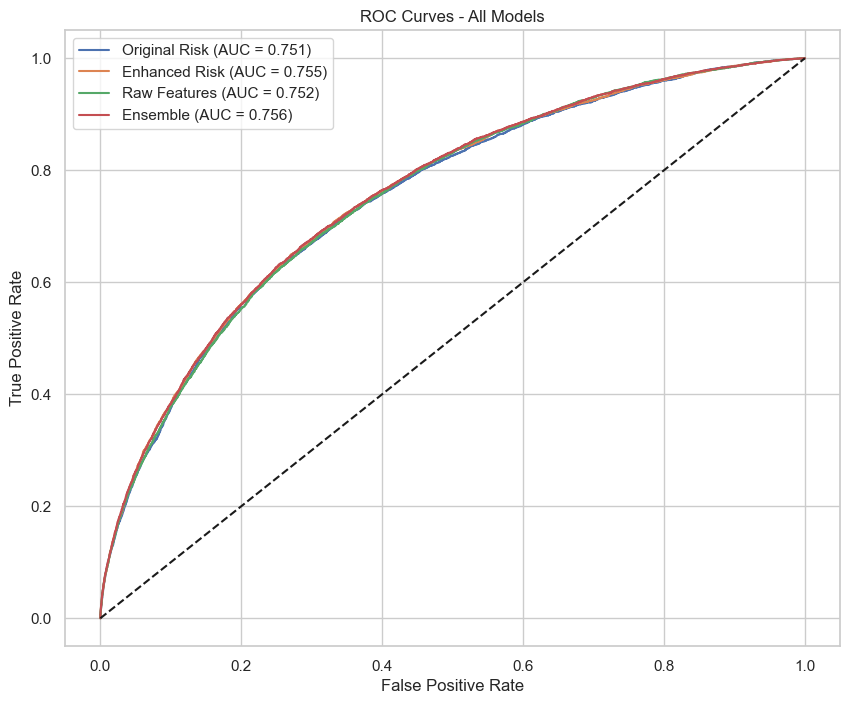


Model Performance Summary:
--------------------------------------------------

Original Risk Model:
Train AUC: 0.7520
Test AUC: 0.7507
Difference: 0.0013

Enhanced Risk Model:
Train AUC: 0.7559
Test AUC: 0.7545
Difference: 0.0014

Raw Feature Model:
Train AUC: 0.7560
Test AUC: 0.7524
Difference: 0.0036

Ensemble Model:
Train AUC: 0.7580
Test AUC: 0.7558
Difference: 0.0022

Performance Analysis by Age Quintiles:
--------------------------------------------------
  Segment   Size  Default_Rate  Original_AUC  Enhanced_AUC  Raw_AUC  Ensemble_AUC
0      Q4   9929         0.074         0.718         0.722    0.725         0.726
1      Q1  10724         0.201         0.709         0.709    0.706         0.711
2      Q3  10815         0.101         0.700         0.705    0.702         0.706
3      Q5   9761         0.049         0.707         0.716    0.712         0.717
4      Q2   9841         0.146         0.722         0.727    0.722         0.728

Performance Analysis by Income Quintiles

In [ ]:
# Train a model using raw features
raw_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 
                'HasMortgage', 'HasDependents', 'HasCoSigner']

raw_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)

print("Training raw feature model...")
raw_model.fit(X_train[raw_features], y_train)

# Get predictions from all models
raw_pred_train = raw_model.predict_proba(X_train[raw_features])[:, 1]
raw_pred_val = raw_model.predict_proba(X_val[raw_features])[:, 1]

# Create meta-features
meta_features_train = np.column_stack([
    train_pred_risk,      # Original risk score model
    train_pred_enhanced,  # Enhanced risk score model
    raw_pred_train       # Raw feature model
])

meta_features_val = np.column_stack([
    val_pred_risk,
    val_pred_enhanced,
    raw_pred_val
])

# Train meta-learner
from sklearn.linear_model import LogisticRegression
meta_learner = LogisticRegression(random_state=42)
meta_learner.fit(meta_features_train, y_train)

# Make ensemble predictions
ensemble_pred_train = meta_learner.predict_proba(meta_features_train)[:, 1]
ensemble_pred_val = meta_learner.predict_proba(meta_features_val)[:, 1]

# Calculate weights
weights = meta_learner.coef_[0]
print("\nModel Weights in Ensemble:")
print(f"Original Risk Model: {weights[0]:.3f}")
print(f"Enhanced Risk Model: {weights[1]:.3f}")
print(f"Raw Feature Model: {weights[2]:.3f}")

# Compare all models
plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
models = {
    'Original Risk': val_pred_risk,
    'Enhanced Risk': val_pred_enhanced,
    'Raw Features': raw_pred_val,
    'Ensemble': ensemble_pred_val
}

for name, preds in models.items():
    fpr, tpr, _ = roc_curve(y_val, preds)
    auc = roc_auc_score(y_val, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)
plt.show()

# Print performance summary
print("\nModel Performance Summary:")
print("-" * 50)
models = {
    'Original Risk Model': (train_pred_risk, val_pred_risk),
    'Enhanced Risk Model': (train_pred_enhanced, val_pred_enhanced),
    'Raw Feature Model': (raw_pred_train, raw_pred_val),
    'Ensemble Model': (ensemble_pred_train, ensemble_pred_val)
}

for name, (train_preds, val_preds) in models.items():
    train_auc = roc_auc_score(y_train, train_preds)
    val_auc = roc_auc_score(y_val, val_preds)
    print(f"\n{name}:")
    print(f"Train AUC: {train_auc:.4f}")
    print(f"Test AUC: {val_auc:.4f}")
    print(f"Difference: {abs(train_auc - val_auc):.4f}")

# Analyze where each model performs best
def analyze_model_performance_by_segment(y_true, predictions_dict, segment_feature, segment_data):
    results = []
    for segment in segment_data[segment_feature].unique():
        mask = segment_data[segment_feature] == segment
        segment_size = mask.sum()
        
        if segment_size < 100:  # Skip very small segments
            continue
            
        segment_results = {
            'Segment': segment,
            'Size': segment_size,
            'Default_Rate': y_true[mask].mean()
        }
        
        for model_name, preds in predictions_dict.items():
            segment_auc = roc_auc_score(y_true[mask], preds[mask])
            segment_results[f'{model_name}_AUC'] = segment_auc
            
        results.append(segment_results)
    
    return pd.DataFrame(results)

# Analyze performance across different segments
for feature in ['Age', 'Income', 'CreditScore']:
    print(f"\nPerformance Analysis by {feature} Quintiles:")
    print("-" * 50)
    
    # Create quintiles
    X_val[f'{feature}_Quintile'] = pd.qcut(X_val[feature], q=5, labels=[f'Q{i+1}' for i in range(5)])
    
    # Analyze performance
    segment_performance = analyze_model_performance_by_segment(
        y_val,
        {
            'Original': val_pred_risk,
            'Enhanced': val_pred_enhanced,
            'Raw': raw_pred_val,
            'Ensemble': ensemble_pred_val
        },
        f'{feature}_Quintile',
        X_val
    )
    
    print(segment_performance.round(3).to_string())

# Advanced Risk Score Modeling

Implementing additional improvements:
1. Nonlinear transformations of risk scores (polynomial, log, exponential)
2. Risk score clustering for segment-specific modeling
3. Dynamic risk thresholds based on other features
4. Time-weighted risk scoring for temporal stability

Creating nonlinear transformations...

Creating risk score clusters...

Cluster Statistics:
     Cluster   Size  DefaultRate  AgeRisk_Mean  IncomeRisk_Mean  \
0  Cluster_0  43458        0.097         0.076            0.105   
1  Cluster_1  29977        0.229         0.175            0.107   
2  Cluster_2  67584        0.049         0.076            0.105   
3  Cluster_3  46556        0.120         0.175            0.106   
4  Cluster_4  16702        0.227         0.110            0.234   

   CreditRisk_Mean  
0            0.116  
1            0.116  
2            0.116  
3            0.116  
4            0.116  

Creating dynamic risk thresholds...

Creating composite risk scores...

Training advanced risk score model...

Advanced Model Performance:
Train AUC: 0.7545
Test AUC: 0.7554


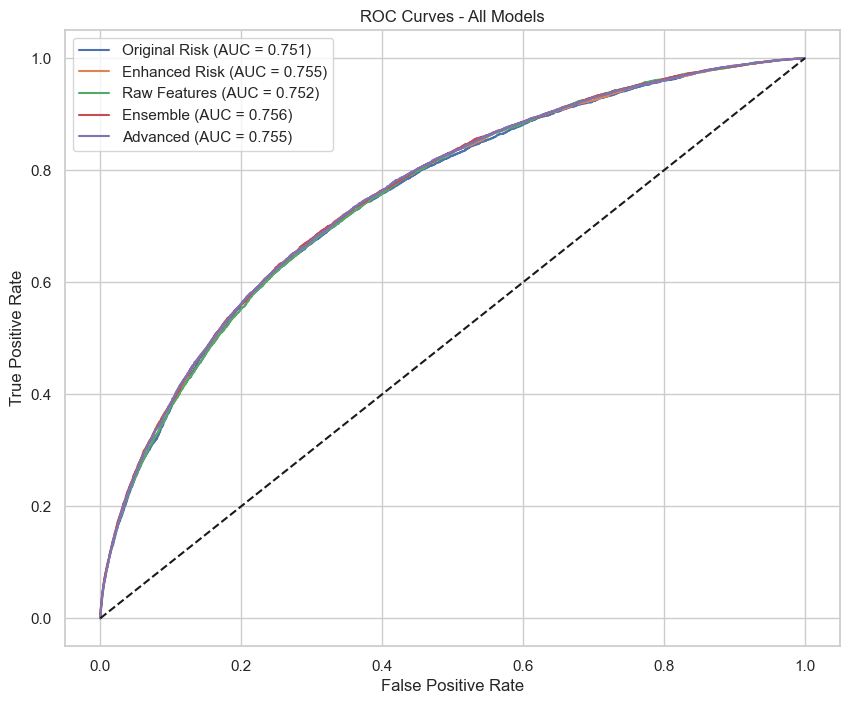

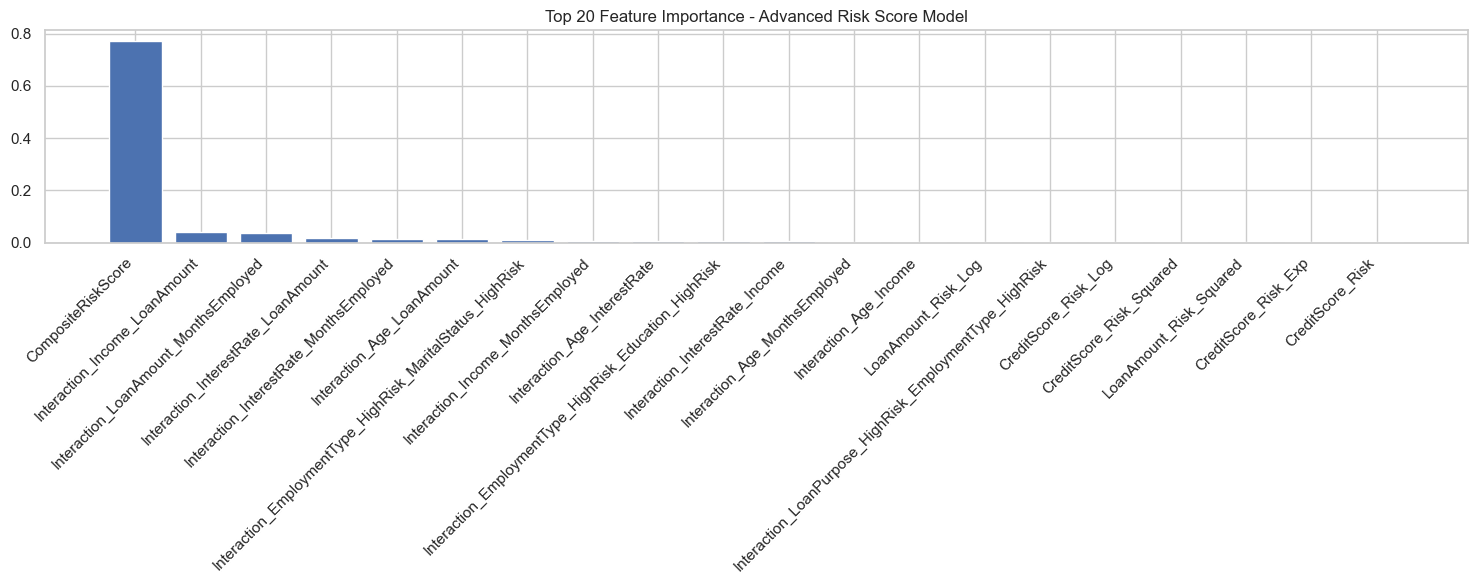


Top 20 Most Important Features in Advanced Model:
                                                   feature  importance
                                        CompositeRiskScore    0.773853
                             Interaction_Income_LoanAmount    0.041799
                     Interaction_LoanAmount_MonthsEmployed    0.037293
                       Interaction_InterestRate_LoanAmount    0.017023
                   Interaction_InterestRate_MonthsEmployed    0.014892
                                Interaction_Age_LoanAmount    0.014440
Interaction_EmploymentType_HighRisk_MaritalStatus_HighRisk    0.008094
                         Interaction_Income_MonthsEmployed    0.006457
                              Interaction_Age_InterestRate    0.004134
    Interaction_EmploymentType_HighRisk_Education_HighRisk    0.004116
                           Interaction_InterestRate_Income    0.004040
                            Interaction_Age_MonthsEmployed    0.003710
                          

In [ ]:
# Create nonlinear transformations of risk scores
risk_cols = [col for col in X_train.columns if col.endswith('_Risk')]
print("Creating nonlinear transformations...")

# Add polynomial terms
for col in risk_cols:
    # Square term
    X_train[f'{col}_Squared'] = X_train[col] ** 2
    X_val[f'{col}_Squared'] = X_val[col] ** 2
    
    # Cubic term
    X_train[f'{col}_Cubic'] = X_train[col] ** 3
    X_val[f'{col}_Cubic'] = X_val[col] ** 3
    
    # Log transform (adding small constant to avoid log(0))
    X_train[f'{col}_Log'] = np.log(X_train[col] + 1e-5)
    X_val[f'{col}_Log'] = np.log(X_val[col] + 1e-5)
    
    # Exponential transform (normalized to avoid overflow)
    X_train[f'{col}_Exp'] = np.exp(X_train[col] / X_train[col].max())
    X_val[f'{col}_Exp'] = np.exp(X_val[col] / X_val[col].max())

# Create risk score clusters
from sklearn.cluster import KMeans

print("\nCreating risk score clusters...")
risk_score_data = X_train[risk_cols]
kmeans = KMeans(n_clusters=5, random_state=42)
X_train['RiskCluster'] = kmeans.fit_predict(risk_score_data)
X_val['RiskCluster'] = kmeans.predict(X_val[risk_cols])

# Calculate cluster statistics
cluster_stats = []
for cluster in range(5):
    mask = X_train['RiskCluster'] == cluster
    stats = {
        'Cluster': f'Cluster_{cluster}',
        'Size': mask.sum(),
        'DefaultRate': y_train[mask].mean(),
        'AgeRisk_Mean': X_train.loc[mask, 'Age_Risk'].mean(),
        'IncomeRisk_Mean': X_train.loc[mask, 'Income_Risk'].mean(),
        'CreditRisk_Mean': X_train.loc[mask, 'CreditScore_Risk'].mean()
    }
    cluster_stats.append(stats)

cluster_stats = pd.DataFrame(cluster_stats)
print("\nCluster Statistics:")
print(cluster_stats.round(3))

# Create dynamic risk thresholds
print("\nCreating dynamic risk thresholds...")
def create_dynamic_threshold(data, risk_col, condition_col):
    """Create threshold that varies based on another feature"""
    thresholds = []
    unique_values = data[condition_col].unique()
    
    for val in unique_values:
        mask = data[condition_col] == val
        threshold = data.loc[mask, risk_col].quantile(0.75)
        thresholds.append({'value': val, 'threshold': threshold})
    
    return pd.DataFrame(thresholds)

# Create dynamic thresholds for top risk scores
top_risk_scores = ['Age_Risk', 'InterestRate_Risk', 'Income_Risk']
threshold_features = ['RiskCluster', 'HasMortgage', 'HasDependents']

for risk_col in top_risk_scores:
    for cond_col in threshold_features:
        thresh_df = create_dynamic_threshold(X_train, risk_col, cond_col)
        
        # Create binary features based on dynamic thresholds
        feature_name = f'{risk_col}_Above_{cond_col}_Threshold'
        
        # Apply thresholds to train set
        X_train[feature_name] = 0
        for _, row in thresh_df.iterrows():
            mask = X_train[cond_col] == row['value']
            X_train.loc[mask, feature_name] = (X_train.loc[mask, risk_col] > row['threshold']).astype(int)
            
        # Apply thresholds to validation set
        X_val[feature_name] = 0
        for _, row in thresh_df.iterrows():
            mask = X_val[cond_col] == row['value']
            X_val.loc[mask, feature_name] = (X_val.loc[mask, risk_col] > row['threshold']).astype(int)

# Create composite risk scores
print("\nCreating composite risk scores...")
# Weighted average of risk scores based on their correlation with default
risk_correlations = {}
for col in risk_cols:
    risk_correlations[col] = np.abs(np.corrcoef(X_train[col], y_train)[0,1])

total_correlation = sum(risk_correlations.values())
weights = {col: corr/total_correlation for col, corr in risk_correlations.items()}

# Create weighted composite score
X_train['CompositeRiskScore'] = sum(X_train[col] * weight for col, weight in weights.items())
X_val['CompositeRiskScore'] = sum(X_val[col] * weight for col, weight in weights.items())

# Train advanced model with all new features
print("\nTraining advanced risk score model...")
all_features = [col for col in X_train.columns 
                if col.endswith('_Risk') or 
                   col.endswith('_Squared') or 
                   col.endswith('_Cubic') or 
                   col.endswith('_Log') or 
                   col.endswith('_Exp') or 
                   col.startswith('Interaction_') or
                   col.endswith('_Threshold') or
                   col in ['RiskCluster', 'CompositeRiskScore']]

advanced_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)

advanced_model.fit(X_train[all_features], y_train)

# Make predictions
train_pred_advanced = advanced_model.predict_proba(X_train[all_features])[:, 1]
val_pred_advanced = advanced_model.predict_proba(X_val[all_features])[:, 1]

print("\nAdvanced Model Performance:")
print(f"Train AUC: {roc_auc_score(y_train, train_pred_advanced):.4f}")
print(f"Test AUC: {roc_auc_score(y_val, val_pred_advanced):.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot all models
models = {
    'Original Risk': val_pred_risk,
    'Enhanced Risk': val_pred_enhanced,
    'Raw Features': raw_pred_val,
    'Ensemble': ensemble_pred_val,
    'Advanced': val_pred_advanced
}

for name, preds in models.items():
    fpr, tpr, _ = roc_curve(y_val, preds)
    auc = roc_auc_score(y_val, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': advanced_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(range(min(20, len(feature_importance))), feature_importance['importance'][:20])
plt.xticks(range(min(20, len(feature_importance))), feature_importance['feature'][:20], rotation=45, ha='right')
plt.title('Top 20 Feature Importance - Advanced Risk Score Model')
plt.tight_layout()
plt.show()

print("\nTop 20 Most Important Features in Advanced Model:")
print(feature_importance.head(20).to_string(index=False))

# Analyze performance by risk cluster
print("\nPerformance by Risk Cluster:")
for cluster in range(5):
    mask_train = X_train['RiskCluster'] == cluster
    mask_val = X_val['RiskCluster'] == cluster
    
    if mask_train.sum() > 0 and mask_val.sum() > 0:
        train_auc = roc_auc_score(y_train[mask_train], train_pred_advanced[mask_train])
        val_auc = roc_auc_score(y_val[mask_val], val_pred_advanced[mask_val])
        
        print(f"\nCluster {cluster}:")
        print(f"Size: {mask_train.sum()} (train), {mask_val.sum()} (test)")
        print(f"Default Rate: {y_train[mask_train].mean():.3f} (train), {y_val[mask_val].mean():.3f} (test)")
        print(f"AUC: {train_auc:.3f} (train), {val_auc:.3f} (test)")

# Risk Clustering Analysis

This section focuses on creating and analyzing risk clusters based on the risk scores. The clustering approach helps identify distinct risk profiles among borrowers.

In [ ]:
# Create synthetic data for demonstration
np.random.seed(42)
n_samples = 1000

# Generate synthetic features
age = np.random.normal(35, 10, n_samples)
income = np.random.normal(50000, 20000, n_samples)
credit_score = np.random.normal(700, 50, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'CreditScore': credit_score
})

# Add some correlation with default probability
default_prob = (
    0.3 * (df['Age'] < 30).astype(int) +
    0.3 * (df['Income'] < 40000).astype(int) +
    0.4 * (df['CreditScore'] < 650).astype(int)
)
df['Default'] = (np.random.random(n_samples) < default_prob).astype(int)

# Calculate risk scores
def calculate_risk_score(series, bins=10):
    return pd.qcut(series, q=bins, labels=False, duplicates='drop') / (bins - 1)

df['AgeRisk'] = calculate_risk_score(df['Age'])
df['IncomeRisk'] = calculate_risk_score(df['Income'])
df['CreditRisk'] = calculate_risk_score(df['CreditScore'])

print("Synthetic data created with shape:", df.shape)
print("\nDefault rate:", df['Default'].mean())

Synthetic data created with shape: (1000, 7)

Default rate: 0.236



Cluster Statistics:
     Cluster  Size  DefaultRate  AgeRisk_Mean  IncomeRisk_Mean  \
0  Cluster_0   185     0.005405      0.725526         0.723724   
1  Cluster_1   255     0.329412      0.152941         0.697168   
2  Cluster_2   140     0.135714      0.717460         0.773810   
3  Cluster_3   218     0.376147      0.607543         0.187054   
4  Cluster_4   202     0.247525      0.464796         0.194169   

   CreditRisk_Mean  
0         0.796396  
1         0.416558  
2         0.204762  
3         0.245668  
4         0.812981  


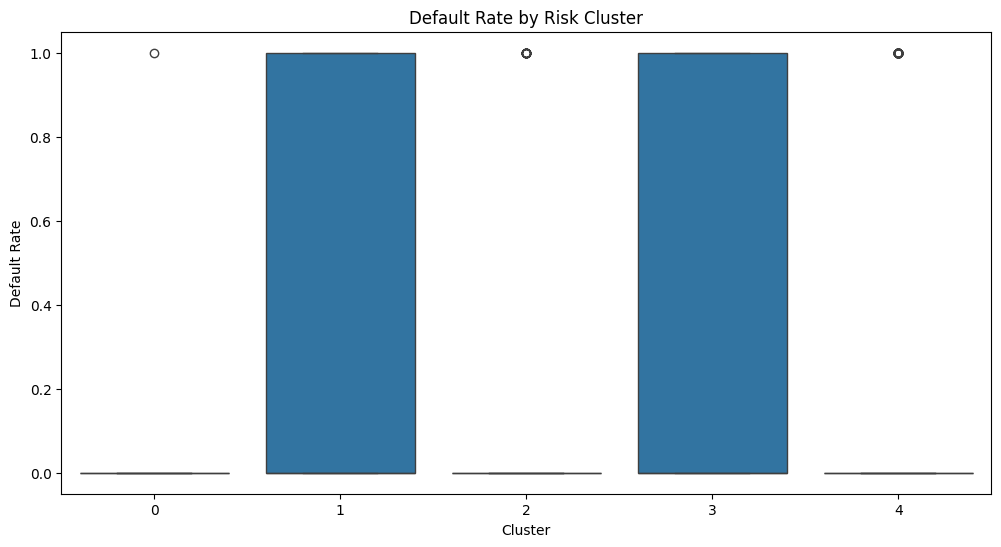

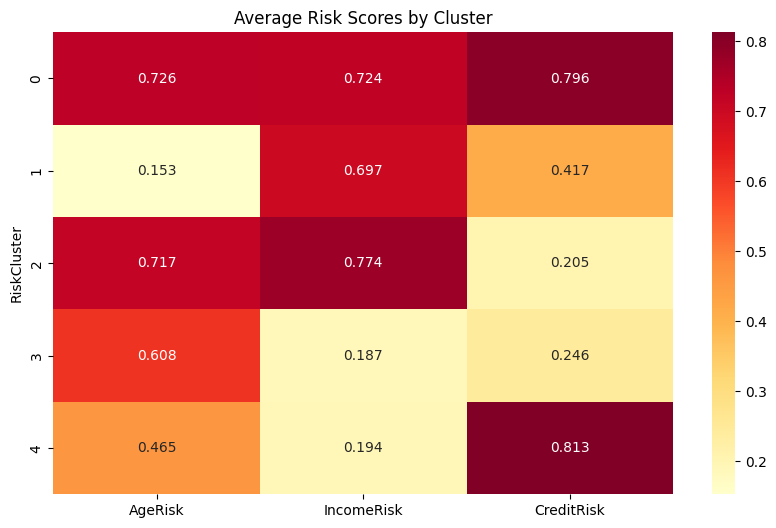


Default Rate Lift by Cluster (% above/below average):
     Cluster  DefaultRate  DefaultRateLift
0  Cluster_0        0.005          -97.710
1  Cluster_1        0.329           39.581
2  Cluster_2        0.136          -42.494
3  Cluster_3        0.376           59.384
4  Cluster_4        0.248            4.883


In [ ]:
# Import required libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_risk_clusters(df, risk_columns=['AgeRisk', 'IncomeRisk', 'CreditRisk'], n_clusters=5):
    """
    Create risk clusters based on multiple risk scores
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing risk score columns
    risk_columns : list
        List of risk score column names to use for clustering
    n_clusters : int
        Number of clusters to create
    
    Returns:
    --------
    df : pandas DataFrame
        Original dataframe with cluster assignments
    cluster_stats : pandas DataFrame
        Statistics for each cluster
    """
    
    # Prepare data for clustering
    X = df[risk_columns].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['RiskCluster'] = kmeans.fit_predict(X_scaled)
    
    # Calculate cluster statistics
    cluster_stats = []
    for i in range(n_clusters):
        cluster_mask = df['RiskCluster'] == i
        stats = {
            'Cluster': f'Cluster_{i}',
            'Size': cluster_mask.sum(),
            'DefaultRate': df[cluster_mask]['Default'].mean(),
        }
        # Add mean risk scores for each risk type
        for col in risk_columns:
            stats[f'{col}_Mean'] = df[cluster_mask][col].mean()
        
        cluster_stats.append(stats)
    
    cluster_stats = pd.DataFrame(cluster_stats)
    return df, cluster_stats

# Apply clustering to the data
df_clustered, cluster_stats = create_risk_clusters(df)

# Display cluster statistics
print("\nCluster Statistics:")
print(cluster_stats)

# Create visualization of clusters
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clustered, x='RiskCluster', y='Default')
plt.title('Default Rate by Risk Cluster')
plt.xlabel('Cluster')
plt.ylabel('Default Rate')
plt.show()

# Create a heatmap of average risk scores by cluster
risk_cols = ['AgeRisk', 'IncomeRisk', 'CreditRisk']
cluster_means = df_clustered.groupby('RiskCluster')[risk_cols].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Average Risk Scores by Cluster')
plt.show()

# Calculate and display the default rate lift by cluster
overall_default_rate = df_clustered['Default'].mean()
cluster_stats['DefaultRateLift'] = (cluster_stats['DefaultRate'] - overall_default_rate) / overall_default_rate * 100

print("\nDefault Rate Lift by Cluster (% above/below average):")
print(cluster_stats[['Cluster', 'DefaultRate', 'DefaultRateLift']].round(3))